# Load the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import numpy as np
from scipy import stats
import random
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [3]:
od13_mtcentre=pd.read_csv(r'/content/drive/MyDrive/od13_Regdomi8_2_MTLCENTRE.csv')
od03_mtllaval=pd.read_csv(r'/content/drive/MyDrive/od03_Regdomi8_6_MTLLAVAL.csv')
od13_mtllaval= pd.read_csv(r'/content/drive/MyDrive/od13_Regdomi8_6_MTLLAVAL.csv')
od03_mtcentre=pd.read_csv(r'/content/drive/MyDrive/od03_Regdomi8_2_MTLCENTRE.csv')

In [4]:
#all column name capital

od03_mtcentre.columns = od03_mtcentre.columns.str.upper()
od03_mtllaval.columns = od03_mtllaval.columns.str.upper()




In [ ]:
od13_mtcentre

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,NODEPLAC,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS
0,1000013,1,299590,5048131,110,2,3,2,47,2,...,1,1100,5,110,2,110,2,16.36,T,T
1,1000013,1,299590,5048131,110,2,3,2,47,2,...,2,1155,3,110,2,110,2,16.36,NaN,NaN
2,1000013,2,299590,5048131,110,2,3,2,47,1,...,1,730,1,110,2,101,1,20.13,NaN,T
3,1000013,2,299590,5048131,110,2,3,2,47,1,...,2,1100,1,101,1,101,1,20.13,NaN,NaN
4,1000013,2,299590,5048131,110,2,3,2,47,1,...,3,1330,1,101,1,308,5,20.13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110021,9033510,1,293941,5044832,107,2,2,1,20,2,...,1,1600,4,107,2,574,8,41.04,T,T
110022,9033510,1,293941,5044832,107,2,2,1,20,2,...,2,2400,3,574,8,107,2,41.04,NaN,NaN
110023,9033510,2,293941,5044832,107,2,2,1,24,1,...,1,1600,4,107,2,574,8,39.90,NaN,T
110024,9033510,2,293941,5044832,107,2,2,1,24,1,...,2,2400,3,574,8,107,2,39.90,NaN,NaN


In [ ]:
od03_mtcentre

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,NODEPLAC,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS
0,134,1,298617,5043563,106,2,2,1,39,1,...,1,730,1,106.0,2.0,106.0,2.0,26.33,T,T
1,134,1,298617,5043563,106,2,2,1,39,1,...,2,1700,3,106.0,2.0,106.0,2.0,26.33,NaN,NaN
2,134,2,298617,5043563,106,2,2,1,42,2,...,1,800,1,106.0,2.0,110.0,2.0,24.46,NaN,T
3,134,2,298617,5043563,106,2,2,1,42,2,...,2,1630,3,110.0,2.0,106.0,2.0,24.46,NaN,NaN
4,274,1,297828,5042001,106,2,2,1,64,1,...,1,800,4,106.0,2.0,309.0,5.0,25.24,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81488,259997,1,296996,5045637,109,2,2,0,25,1,...,5,1700,3,109.0,2.0,109.0,2.0,27.32,NaN,NaN
81489,259997,2,296996,5045637,109,2,2,0,25,1,...,1,1000,1,109.0,2.0,109.0,2.0,27.32,NaN,T
81490,259997,2,296996,5045637,109,2,2,0,25,1,...,2,1900,3,109.0,2.0,109.0,2.0,27.32,NaN,NaN
81491,259999,1,296991,5045629,109,2,2,1,79,1,...,0,0,0,NaN,NaN,NaN,NaN,27.71,T,T


In [ ]:
od03_mtllaval

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,NODEPLAC,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS
0,3182,1,297373,5057568,408,6,2,1,29,2,...,1,645,1,408.0,6.0,109.0,2.0,21.81,T,T
1,3182,1,297373,5057568,408,6,2,1,29,2,...,2,1545,3,109.0,2.0,408.0,6.0,21.81,NaN,NaN
2,3182,1,297373,5057568,408,6,2,1,29,2,...,3,1800,5,408.0,6.0,408.0,6.0,21.81,NaN,NaN
3,3182,1,297373,5057568,408,6,2,1,29,2,...,4,1930,3,408.0,6.0,408.0,6.0,21.81,NaN,NaN
4,3182,2,297373,5057568,408,6,2,1,11,2,...,1,810,2,408.0,6.0,408.0,6.0,18.05,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31273,240626,1,282637,5051410,404,6,1,1,37,1,...,5,1545,1,642.0,7.0,642.0,7.0,31.40,NaN,NaN
31274,240626,1,282637,5051410,404,6,1,1,37,1,...,6,1620,3,642.0,7.0,404.0,6.0,31.40,NaN,NaN
31275,259027,1,289757,5048078,406,6,3,1,49,1,...,0,0,0,NaN,NaN,NaN,NaN,24.62,T,T
31276,259027,2,289757,5048078,406,6,3,1,39,2,...,0,0,0,NaN,NaN,NaN,NaN,22.03,NaN,T


In [ ]:
od13_mtllaval

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,NODEPLAC,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS
0,1000016,1,290831,5047206,406,6,1,0,32,1,...,1,830,1,406,6,102,1,47.72,T,T
1,1000016,1,290831,5047206,406,6,1,0,32,1,...,2,2400,3,102,1,406,6,47.72,NaN,NaN
2,1000032,1,286639,5045158,403,6,3,2,59,2,...,1,1000,5,403,6,402,6,28.16,T,T
3,1000032,1,286639,5045158,403,6,3,2,59,2,...,2,1035,3,402,6,403,6,28.16,NaN,NaN
4,1000032,2,286639,5045158,403,6,3,2,60,1,...,1,1000,5,403,6,402,6,26.45,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39238,9032841,2,283249,5044460,403,6,3,1,30,2,...,3,1200,3,101,1,403,6,30.51,NaN,NaN
39239,9032841,2,283249,5044460,403,6,3,1,30,2,...,4,1655,6,403,6,403,6,30.51,NaN,NaN
39240,9032841,2,283249,5044460,403,6,3,1,30,2,...,5,1700,3,403,6,403,6,30.51,NaN,NaN
39241,9032841,3,283249,5044460,403,6,3,1,6,2,...,1,730,2,403,6,403,6,24.06,NaN,T


# Data segmenation



*   Segment A: women between the ages of 20 and 29
*   Segment B: women between the ages of 30 and 39



In [5]:
od13_mtcentre_w20_25 = od13_mtcentre[(od13_mtcentre["AGE"] > 19) &
                                    (od13_mtcentre["AGE"] < 26) &
                                    (od13_mtcentre["SEXE"] == 2)&
                                     (od13_mtcentre["P_STATUT"]==3)]
od03_mtcentre_w20_25 = od03_mtcentre[(od03_mtcentre["AGE"] > 19) &
                                    (od03_mtcentre["AGE"] < 26) &
                                    (od03_mtcentre["SEXE"] == 2)&
                                     (od03_mtcentre["P_STATUT"]==3)]
od13_mtllaval_w20_25 = od13_mtllaval[(od13_mtllaval["AGE"] > 19) &
                                    (od13_mtllaval["AGE"] < 26) &
                                    (od13_mtllaval["SEXE"] == 2)&
                                     (od13_mtllaval["P_STATUT"]==3)]
od03_mtllaval_w20_25 = od03_mtllaval[(od03_mtllaval["AGE"] > 19) &
                                    (od03_mtllaval["AGE"] < 26) &
                                    (od03_mtllaval["SEXE"] == 2)&
                                     (od03_mtllaval["P_STATUT"]==3)]

In [6]:
od13_mtcentre_w26_30 = od13_mtcentre[(od13_mtcentre["AGE"] > 25) &
                                    (od13_mtcentre["AGE"] < 31) &
                                    (od13_mtcentre["SEXE"] == 2)&
                                     (od13_mtcentre["P_STATUT"]==1)]
od03_mtcentre_w26_30 = od03_mtcentre[(od03_mtcentre["AGE"] > 25) &
                                    (od03_mtcentre["AGE"] < 31) &
                                    (od03_mtcentre["SEXE"] == 2)&
                                     (od03_mtcentre["P_STATUT"]==1)]
od13_mtllaval_w26_30 = od13_mtllaval[(od13_mtllaval["AGE"] > 25) &
                                    (od13_mtllaval["AGE"] < 31) &
                                    (od13_mtllaval["SEXE"] == 2)&
                                     (od13_mtllaval["P_STATUT"]==1)]
od03_mtllaval_w26_30 = od03_mtllaval[(od03_mtllaval["AGE"] > 25) &
                                    (od03_mtllaval["AGE"] < 31) &
                                    (od03_mtllaval["SEXE"] == 2)&
                                     (od03_mtllaval["P_STATUT"]==1)]

add a person column

In [7]:
#SgA
od13_mtcentre_w20_25['person'] = od13_mtcentre_w20_25['FEUILLET'].astype(str) + od13_mtcentre_w20_25['RANG'].astype(str)
od03_mtcentre_w20_25['person'] = od03_mtcentre_w20_25['FEUILLET'].astype(str) + od03_mtcentre_w20_25['RANG'].astype(str)
od13_mtllaval_w20_25['person'] = od13_mtllaval_w20_25['FEUILLET'].astype(str) + od13_mtllaval_w20_25['RANG'].astype(str)
od03_mtllaval_w20_25['person'] = od03_mtllaval_w20_25['FEUILLET'].astype(str) + od03_mtllaval_w20_25['RANG'].astype(str)

#SegB

od13_mtcentre_w26_30['person'] = od13_mtcentre_w26_30['FEUILLET'].astype(str) + od13_mtcentre_w26_30['RANG'].astype(str)
od03_mtcentre_w26_30['person'] = od03_mtcentre_w26_30['FEUILLET'].astype(str) + od03_mtcentre_w26_30['RANG'].astype(str)
od13_mtllaval_w26_30['person'] = od13_mtllaval_w26_30['FEUILLET'].astype(str) + od13_mtllaval_w26_30['RANG'].astype(str)
od03_mtllaval_w26_30['person'] = od03_mtllaval_w26_30['FEUILLET'].astype(str) + od03_mtllaval_w26_30['RANG'].astype(str)





<ipython-input-7-6b94695eacce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od13_mtcentre_w20_25['person'] = od13_mtcentre_w20_25['FEUILLET'].astype(str) + od13_mtcentre_w20_25['RANG'].astype(str)
<ipython-input-7-6b94695eacce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od03_mtcentre_w20_25['person'] = od03_mtcentre_w20_25['FEUILLET'].astype(str) + od03_mtcentre_w20_25['RANG'].astype(str)
<ipython-input-7-6b94695eacce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [ ]:
od13_mtcentre_w20_25.head()

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS,person
196,1000368,3,294408,5046377,108,2,3,2,21,2,...,930,2,108,2,101,1,29.92,NaN,T,10003683
197,1000368,3,294408,5046377,108,2,3,2,21,2,...,1115,3,101,1,108,2,29.92,NaN,NaN,10003683
447,1001066,2,293855,5046874,108,2,3,1,20,2,...,1215,2,108,2,105,2,32.49,NaN,T,10010662
448,1001066,2,293855,5046874,108,2,3,1,20,2,...,1630,3,105,2,108,2,32.49,NaN,NaN,10010662
591,1001427,1,303603,5051589,112,2,3,1,22,2,...,700,2,112,2,111,2,33.45,T,T,10014271


In [ ]:
od13_mtcentre_w20_25

,FEUILLET,RANG,XDOMI,YDOMI,SDOMI100,REGDOMI8,PERSLOGI,AUTOLOGI,AGE,SEXE,...,HREDE,MOTIF,SORIG100,REGORIG8,SDEST100,REGDEST8,FACPER,F_MENAGE,F_PERS,person
196,1000368,3,294408,5046377,108,2,3,2,21,2,...,930,2,108,2,101,1,29.92,NaN,T,10003683
197,1000368,3,294408,5046377,108,2,3,2,21,2,...,1115,3,101,1,108,2,29.92,NaN,NaN,10003683
447,1001066,2,293855,5046874,108,2,3,1,20,2,...,1215,2,108,2,105,2,32.49,NaN,T,10010662
448,1001066,2,293855,5046874,108,2,3,1,20,2,...,1630,3,105,2,108,2,32.49,NaN,NaN,10010662
591,1001427,1,303603,5051589,112,2,3,1,22,2,...,700,2,112,2,111,2,33.45,T,T,10014271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110011,9032611,1,294063,5045566,108,2,1,0,23,2,...,1345,3,108,2,108,2,44.61,NaN,NaN,90326111
110012,9032611,1,294063,5045566,108,2,1,0,23,2,...,1600,1,108,2,101,1,44.61,NaN,NaN,90326111
110013,9032611,1,294063,5045566,108,2,1,0,23,2,...,2130,3,101,1,108,2,44.61,NaN,NaN,90326111
110021,9033510,1,293941,5044832,107,2,2,1,20,2,...,1600,4,107,2,574,8,41.04,T,T,90335101


## Estimae total poulation

In [8]:
#mtcentre
# SEG A
#group 2013

new_od13_mtcentre_w20_25=od13_mtcentre_w20_25.fillna(0)
TPmt_segA13 = od13_mtcentre_w20_25['FACPER'].sum()


#group 2003
new_od03_mtcentre_w20_25=od03_mtcentre_w20_25.fillna(0)
TPmt_segA03 = new_od03_mtcentre_w20_25["FACPER"].sum()


#SEG B
#group 2013
new_od13_mtcentre_w26_30=od13_mtcentre_w26_30.fillna(0)
TPmt_segB13 = new_od13_mtcentre_w26_30["FACPER"].sum()


#group 2003

new_od03_mtcentre_w26_30=od03_mtcentre_w26_30.fillna(0)
TPmt_segB03 = new_od03_mtcentre_w26_30["FACPER"].sum()

#Laval
# SEG A
#group 2013

new_od13_mtllaval_w20_25=od13_mtllaval_w20_25.fillna(0)
TPlaval_segA13 = new_od13_mtllaval_w20_25["FACPER"].sum()

#group 2003

new_od03_mtllaval_w20_25=od03_mtllaval_w20_25.fillna(0)
TPlaval_segA03 = new_od03_mtllaval_w20_25["FACPER"].sum()

#seg B
#2013

new_od13_mtllaval_w26_30=od13_mtllaval_w26_30.fillna(0)
TPlaval_segB13 = new_od13_mtllaval_w26_30["FACPER"].sum()

#2003

new_od03_mtllaval_w26_30=od03_mtllaval_w26_30.fillna(0)
TPlaval_segB03 = new_od03_mtllaval_w26_30["FACPER"].sum()

In [ ]:
TPlaval_segB03

21977.66

frequency distribution

Seg B

In [9]:
import pandas as pd

# Assuming your DataFrame is named od03_mtllaval_w26_30

# Step 1: Calculate work trip counts per person
work_trip_counts = od03_mtllaval_w26_30.groupby('person')['MOTIF'].apply(lambda x: (x==1).sum())

# Step 2: Sum FACPER for all trips per person
facper_sums = od03_mtllaval_w26_30.groupby('person')['FACPER'].sum()

# Step 3: Assign the FACPER sum to the corresponding work trip count
facper_tally = facper_sums.groupby(work_trip_counts).sum()

# The result is in facper_tally, where the index represents the number of work trips,
# and the values are the total FACPER sums for persons with that many trips.


In [ ]:
facper_tally

MOTIF
0     2782.75
1    18041.54
2      845.67
3      307.70
Name: FACPER, dtype: float64

In [ ]:
sum(facper_tally)

21977.66

# Visualization

In [10]:

def calculate_facper_proportion(dataset, total_population,motif):
    # Calculate work trip counts per person
    work_trip_counts = dataset.groupby('person')['MOTIF'].apply(lambda x: (x == motif).sum())

    # Sum FACPER for all trips per person
    facper_sums = dataset.groupby('person')['FACPER'].sum()

    # Assign the FACPER sum to the corresponding work trip count
    facper_tally = facper_sums.groupby(work_trip_counts).sum()

    # Divide each tally by the total population
    proportion = (facper_tally / total_population)*100

    return proportion

In [ ]:
calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,1)

MOTIF
0    12.661721
1    82.090359
2     3.847862
3     1.400058
Name: FACPER, dtype: float64

In [ ]:
calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,1)

MOTIF
0    17.822081
1    77.035668
2     5.142251
Name: FACPER, dtype: float64

frequency dist seg b laval
1. Motif 1 work
2. Motif 2 Study
3. Motif 4 leisure
4. Motif 5 SHopping
5. Motif 6 others

## Motif = Work

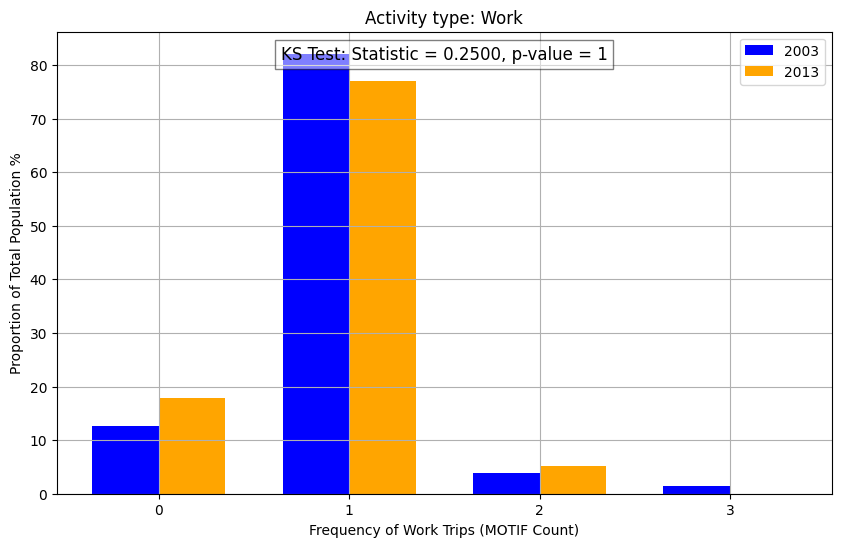

In [11]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,1)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,1)

combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Frequency of Work Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population %')
plt.title('Activity type: Work')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

## Motif = Study

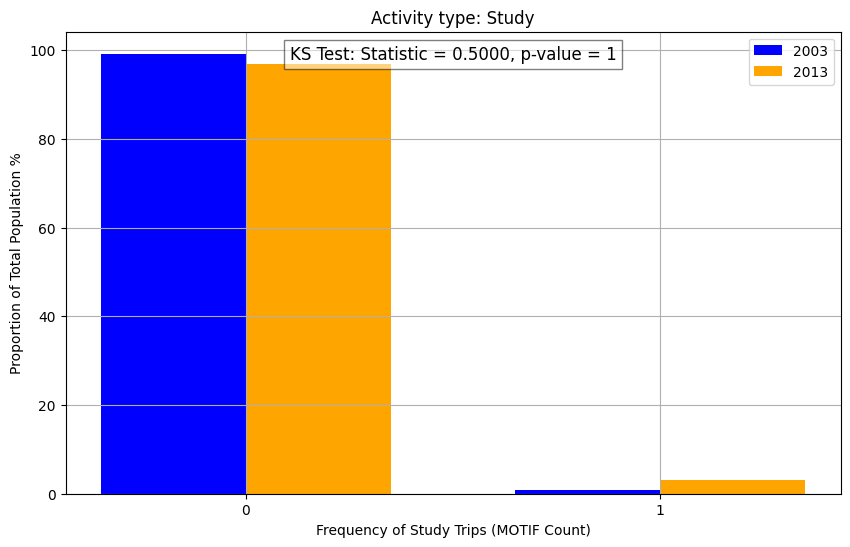

In [12]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,2)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,2)


combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Frequency of Study Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population %')
plt.title('Activity type: Study')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

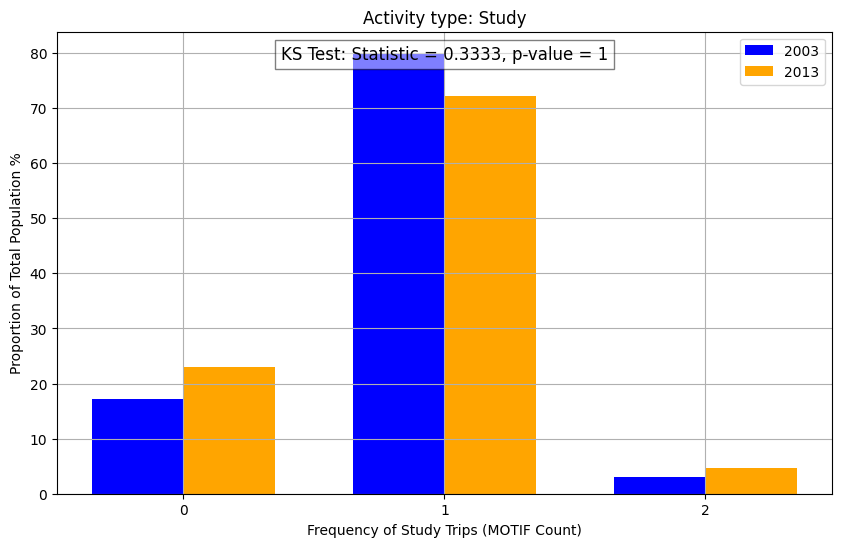

In [69]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w20_25,TPlaval_segA03,2)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w20_25,TPlaval_segA13,2)


combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Frequency of Study Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population %')
plt.title('Activity type: Study')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

## Motif = Other trips

<ipython-input-13-960f05d86e8c>:14: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


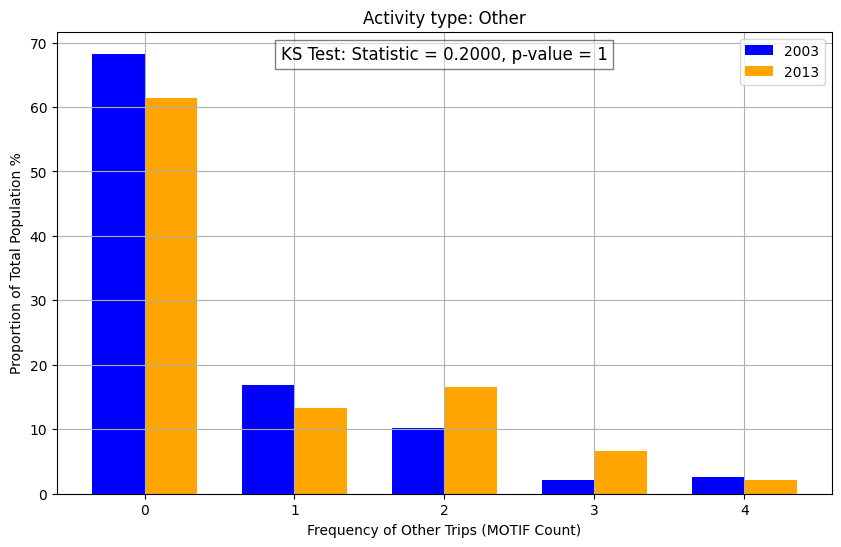

In [13]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,6)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,6)


combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Frequency of Other Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population %')
plt.title('Activity type: Other')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

## Motif Leisure activities

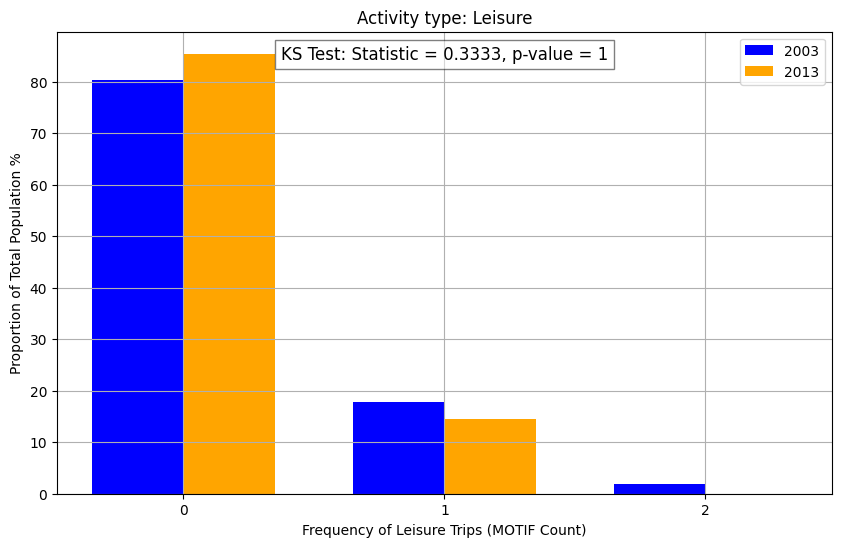

In [14]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,4)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,4)


combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Frequency of Leisure Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population %')
plt.title('Activity type: Leisure')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

## Motif Shopping

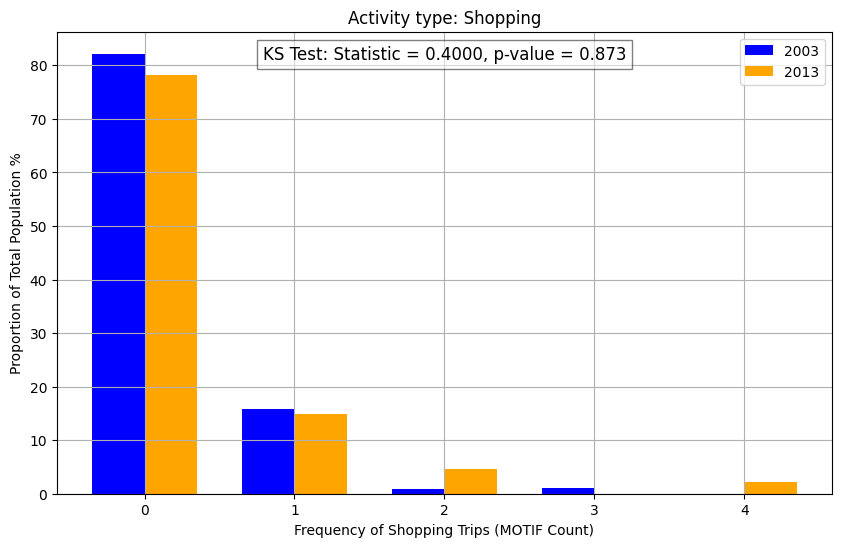

In [15]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,5)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segB13,5)


combined_index = np.union1d(proportion_2003.index, proportion_2013.index)
proportion_2003 = proportion_2003.reindex(combined_index, fill_value=0)
proportion_2013 = proportion_2013.reindex(combined_index, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
indices = np.arange(len(combined_index))
bar_width = 0.35

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(proportion_2003, proportion_2013)


plt.bar(indices - bar_width/2, proportion_2003, bar_width, label='2003', color='blue')
plt.bar(indices + bar_width/2, proportion_2013, bar_width, label='2013', color='orange')
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Frequency of Shopping Trips (MOTIF Count)')
plt.ylabel('Proportion of Total Population %')
plt.title('Activity type: Shopping')
plt.xticks(indices, combined_index)
plt.legend()
plt.grid(True)

K-S test

In [18]:
proportion_2003 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segA03,2)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w26_30,TPlaval_segA13,2)

In [19]:
stats.kstest(proportion_2003, proportion_2013)


KstestResult(statistic=0.5, pvalue=1.0, statistic_location=1.495110790045653, statistic_sign=1)

Visulization

<ipython-input-56-a55c7b83a3c7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od03_mtcentre_w26_30['motif'] = od03_mtcentre_w26_30['motif'].map(category_map)
<ipython-input-56-a55c7b83a3c7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od03_mtcentre_w20_25['motif'] = od03_mtcentre_w20_25['motif'].map(category_map)


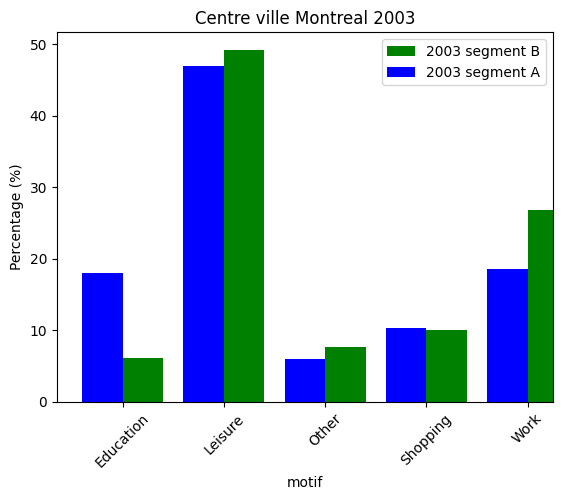

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames
# df1 and df2 are your dataframes

# Mapping for numbers to category labels
category_map = {1: 'Work', 2: 'Education', 3: 'Leisure', 4: 'Shopping', 5: 'Other'}

# Apply mapping and filter categories
od03_mtcentre_w26_30['motif'] = od03_mtcentre_w26_30['motif'].map(category_map)
od03_mtcentre_w20_25['motif'] = od03_mtcentre_w20_25['motif'].map(category_map)
od03_mtcentre_w26_30 = od03_mtcentre_w26_30[od03_mtcentre_w26_30['motif'].notnull()]
od03_mtcentre_w20_25 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['motif'].notnull()]

# Group by 'Category' and get the percentage
grouped1 = od03_mtcentre_w26_30.groupby('motif').size() / len(od03_mtcentre_w26_30) * 100
grouped2 = od03_mtcentre_w20_25.groupby('motif').size() / len(od03_mtcentre_w20_25) * 100

# Convert to DataFrame
df_grouped1 = grouped1.reset_index(name='Percentage')
df_grouped2 = grouped2.reset_index(name='Percentage')

# Set Category as index
df_grouped1.set_index('motif', inplace=True)
df_grouped2.set_index('motif', inplace=True)

# Plotting
fig, ax = plt.subplots()
df_grouped1['Percentage'].plot(kind='bar', color='green', ax=ax, width=0.4, position=0)
df_grouped2['Percentage'].plot(kind='bar', color='blue', ax=ax, width=0.4, position=1)

ax.set_ylabel('Percentage (%)')
ax.set_title('Centre ville Montreal 2003')
plt.xticks(rotation=45)
plt.legend(['2003 segment B', '2003 segment A'])
plt.show()


## KS test

Just change the measure according to needed value

In [174]:
proportion_2003 = calculate_facper_proportion(od03_mtcentre_w26_30,TPmt_segB03,1)
proportion_2013 = calculate_facper_proportion(od03_mtllaval_w26_30,TPlaval_segB03,1)

In [153]:
proportion_2003 = calculate_facper_proportion(od13_mtcentre_w20_25,TPmt_segA13,1)
proportion_2013 = calculate_facper_proportion(od13_mtllaval_w20_25,TPlaval_segA13,1)

In [175]:
stats.kstest(proportion_2003, proportion_2013)


KstestResult(statistic=0.25, pvalue=1.0, statistic_location=78.35296540561241, statistic_sign=1)

# Distribution of Departure time

In [231]:
import pandas as pd

def convert_time_column(df, column_name):
    # Convert to string and pad with zeros to ensure HHMM format
    time_str = df[column_name].astype(str).str.pad(width=4, fillchar='0')

    # Insert colon to get HH:MM format
    formatted_time = time_str.str[:2] + ':' + time_str.str[2:]

    # Custom function to handle times like '24:15'
    def handle_over_24(t):
        hours, minutes = map(int, t.split(':'))
        if hours >= 24:
            hours -= 24
        return f'{hours:02d}:{minutes:02d}'

    # Apply custom function and convert to datetime.time format
    formatted_time = formatted_time.apply(handle_over_24)
    time_object = pd.to_datetime(formatted_time, format='%H:%M').dt.time

    return time_object

# Example usage
od13_mtcentre_w20_25['DEPARTURE'] = convert_time_column(od13_mtcentre_w20_25, 'HREDE')
od03_mtcentre_w20_25['DEPARTURE'] = convert_time_column(od03_mtcentre_w20_25, 'HREDE')



<ipython-input-231-6e6d5c47cec7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od13_mtcentre_w20_25['DEPARTURE'] = convert_time_column(od13_mtcentre_w20_25, 'HREDE')
<ipython-input-231-6e6d5c47cec7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od03_mtcentre_w20_25['DEPARTURE'] = convert_time_column(od03_mtcentre_w20_25, 'HREDE')


In [103]:
od13_mtcentre_w20_25f = od13_mtcentre_w20_25[(od13_mtcentre_w20_25["MOTIF"] == 1)]
od03_mtcentre_w20_25f = od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 1)]


In [104]:
od13_mtcentre_w20_25f2 = od13_mtcentre_w20_25[(od13_mtcentre_w20_25["MOTIF"] == 2)]
od03_mtcentre_w20_25f2 = od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 2)]


In [105]:
od13_mtcentre_w20_25f4 = od13_mtcentre_w20_25[(od13_mtcentre_w20_25["MOTIF"] == 4)]
od03_mtcentre_w20_25f4 = od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 4)]


In [106]:
od13_mtcentre_w20_25f5 = od13_mtcentre_w20_25[(od13_mtcentre_w20_25["MOTIF"] == 5)]
od03_mtcentre_w20_25f5 = od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 5)]


In [107]:
od13_mtcentre_w20_25f6 = od13_mtcentre_w20_25[(od13_mtcentre_w20_25["MOTIF"] == 6)]
od03_mtcentre_w20_25f6 = od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 6)]


In [ ]:
od13_mtcentre.shape

(110026, 23)

<ipython-input-45-cdc81776cb20>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od13_mtcentre_w20_25f['Hourly_Interval'] = od13_mtcentre_w20_25f['DEPARTURE'].apply(convert_to_hourly_interval)


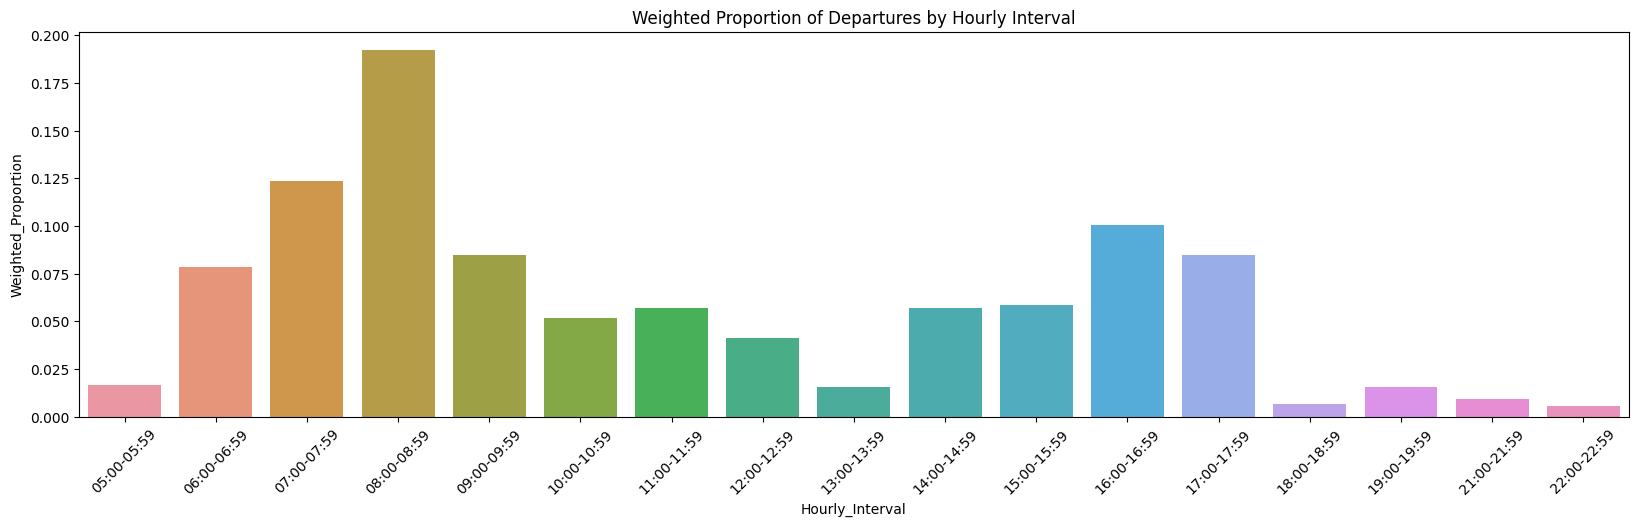

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

# Apply the function to your DEPARTURE column to create an hourly interval column
od13_mtcentre_w20_25f['Hourly_Interval'] = od13_mtcentre_w20_25f['DEPARTURE'].apply(convert_to_hourly_interval)

# Group by 'Hourly_Interval' and sum 'FACPER' for each group
weighted_counts = od13_mtcentre_w20_25f.groupby('Hourly_Interval')['FACPER'].sum()

# Total weight
total_weight = od13_mtcentre_w20_25f['FACPER'].sum()

# Calculate weighted proportions
weighted_proportions = weighted_counts / total_weight

# Reset index to convert the Series to a DataFrame
weighted_proportions_df = weighted_proportions.reset_index()
weighted_proportions_df.columns = ['Hourly_Interval', 'Weighted_Proportion']  # Rename columns for clarity

# Sort by 'Hourly_Interval'
weighted_proportions_df = weighted_proportions_df.sort_values('Hourly_Interval')

# Plotting
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=weighted_proportions_df, x='Hourly_Interval', y='Weighted_Proportion')

# Set title and labels
ax.set(title='Weighted Proportion of Departures by Hourly Interval')
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()


## Seg A Montreal 2003 vs 2013 Motif 1 work

<ipython-input-204-5dfc4c5de3aa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-204-5dfc4c5de3aa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


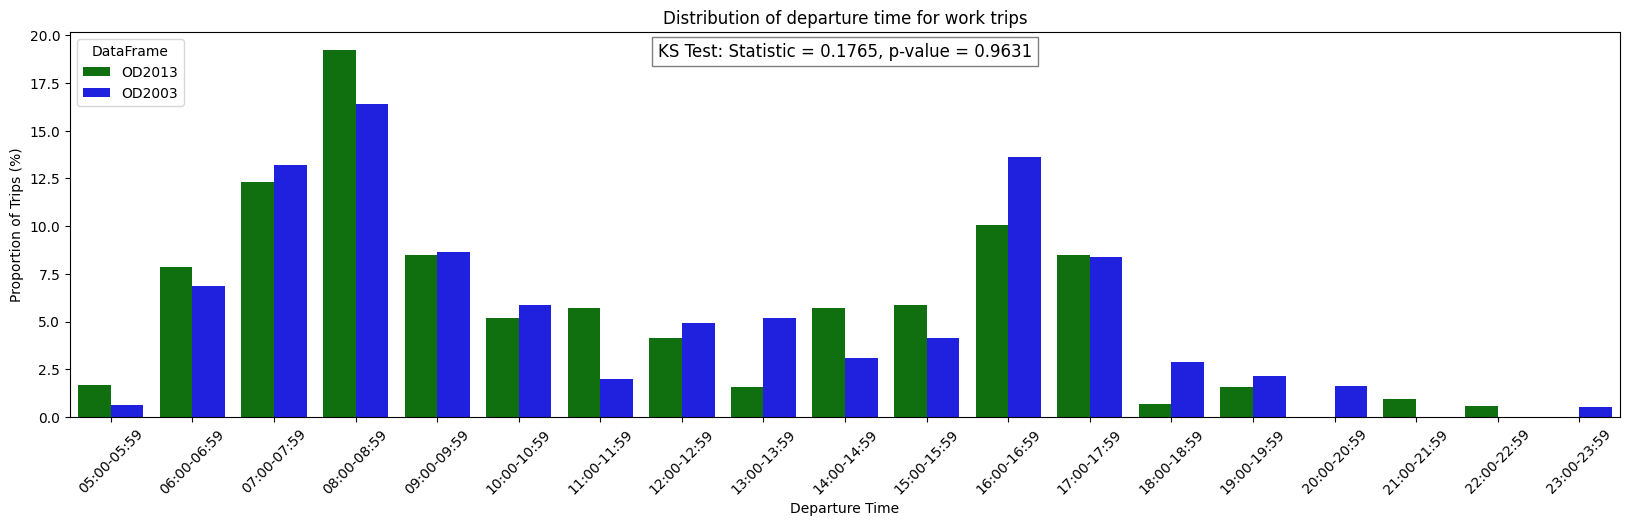

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

def calculate_weighted_proportions(df):
    df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
    weighted_counts = df.groupby('Hourly_Interval')['FACPER'].sum()
    total_weight = df['FACPER'].sum()
    weighted_proportions = weighted_counts / total_weight
    return weighted_proportions.reset_index(name='Weighted_Proportion')

# Calculate weighted proportions for each DataFrame
weighted_proportions_13 = calculate_weighted_proportions(od13_mtcentre_w20_25f)
weighted_proportions_13['DataFrame'] = 'OD2013'

weighted_proportions_03 = calculate_weighted_proportions(od03_mtcentre_w20_25f)
weighted_proportions_03['DataFrame'] = 'OD2003'
# Combine the results
combined_proportions = pd.concat([weighted_proportions_13, weighted_proportions_03])

# Sort by 'Hourly_Interval'
combined_proportions = combined_proportions.sort_values('Hourly_Interval')
combined_proportions['Weighted_Proportion']=combined_proportions['Weighted_Proportion']*100
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions, x='Hourly_Interval', y='Weighted_Proportion', hue='DataFrame', palette={'OD2013': 'green', 'OD2003': 'blue'})

# Set title and labels
plt.xticks( rotation=45)  # Rotate labels for better readability
plt.title('Distribution of departure time for work trips')

# Set x-axis and y-axis labels
plt.xlabel("Departure Time")  # Set x-axis label
plt.ylabel("Proportion of Trips (%)")  # Set y-axis label
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## Seg A Montreal 2003 vs 2013 Motif 2 Study

<ipython-input-205-1e5332dc4a0c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-205-1e5332dc4a0c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


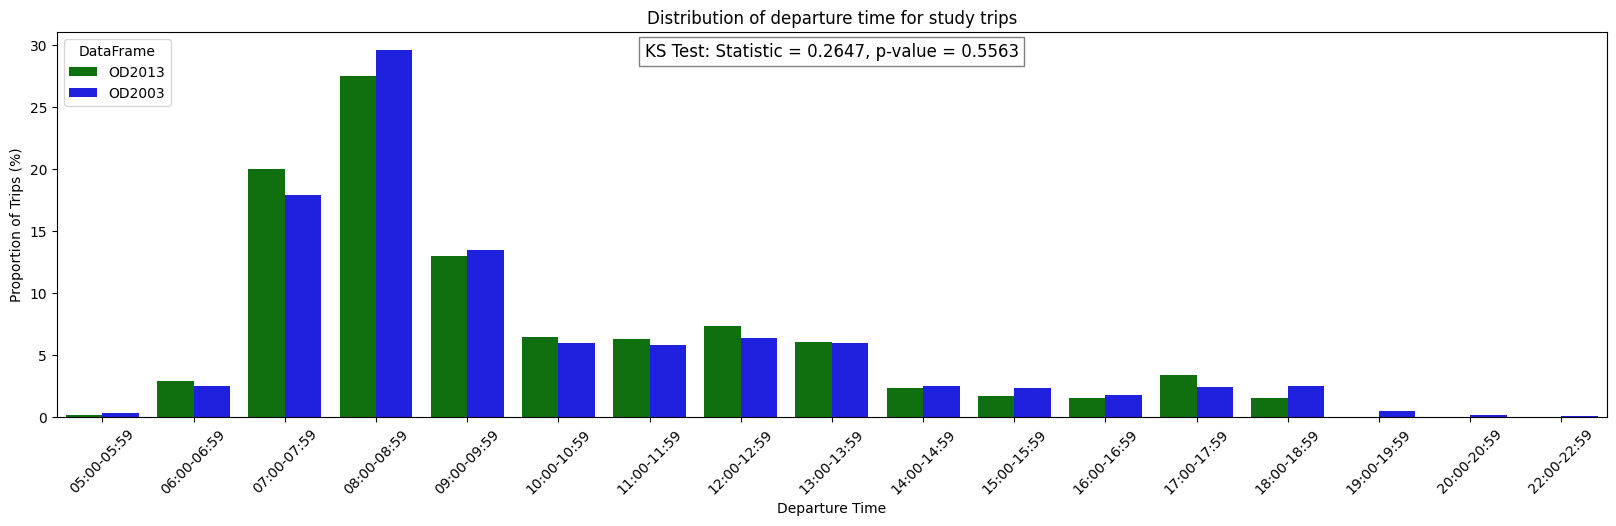

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

def calculate_weighted_proportions(df):
    df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
    weighted_counts = df.groupby('Hourly_Interval')['FACPER'].sum()
    total_weight = df['FACPER'].sum()
    weighted_proportions = weighted_counts / total_weight
    return weighted_proportions.reset_index(name='Weighted_Proportion')

# Calculate weighted proportions for each DataFrame
weighted_proportions_13 = calculate_weighted_proportions(od13_mtcentre_w20_25f2)
weighted_proportions_13['DataFrame'] = 'OD2013'

weighted_proportions_03 = calculate_weighted_proportions(od03_mtcentre_w20_25f2)
weighted_proportions_03['DataFrame'] = 'OD2003'

# Combine the results
combined_proportions = pd.concat([weighted_proportions_13, weighted_proportions_03])

# Sort by 'Hourly_Interval'
combined_proportions = combined_proportions.sort_values('Hourly_Interval')

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])
combined_proportions['Weighted_Proportion']=combined_proportions['Weighted_Proportion']*100

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions, x='Hourly_Interval', y='Weighted_Proportion', hue='DataFrame', palette={'OD2013': 'green', 'OD2003': 'blue'})

# Set title and labels
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title('Distribution of departure time for study trips')

# Set x-axis and y-axis labels
plt.xlabel("Departure Time")  # Set x-axis label
plt.ylabel("Proportion of Trips (%)")  # Set y-axis label
# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## Seg A Montreal 2003 vs 2013 Motif 4 Other trips

<ipython-input-235-53c24e64207e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-235-53c24e64207e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


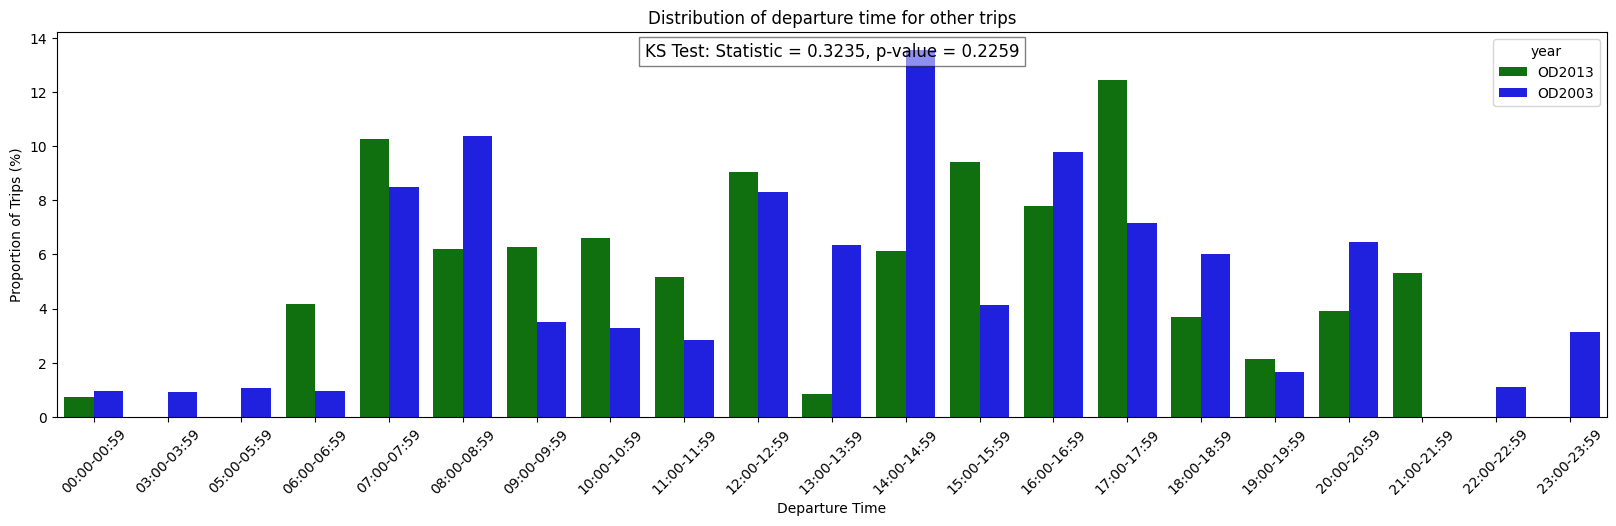

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

def calculate_weighted_proportions(df):
    df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
    weighted_counts = df.groupby('Hourly_Interval')['FACPER'].sum()
    total_weight = df['FACPER'].sum()
    weighted_proportions = weighted_counts / total_weight
    return weighted_proportions.reset_index(name='Weighted_Proportion')

# Calculate weighted proportions for each DataFrame
weighted_proportions_13 = calculate_weighted_proportions(od13_mtcentre_w20_25f6)
weighted_proportions_13['DataFrame'] = 'OD2013'

weighted_proportions_03 = calculate_weighted_proportions(od03_mtcentre_w20_25f6)
weighted_proportions_03['DataFrame'] = 'OD2003'

# Combine the results
combined_proportions = pd.concat([weighted_proportions_13, weighted_proportions_03])

# Sort by 'Hourly_Interval'
combined_proportions = combined_proportions.sort_values('Hourly_Interval')

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])
combined_proportions['Weighted_Proportion']=combined_proportions['Weighted_Proportion']*100

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions, x='Hourly_Interval', y='Weighted_Proportion', hue='DataFrame', palette={'OD2013': 'green', 'OD2003': 'blue'})

# Set title and labels
plt.title('Distribution of departure time for other trips')

# Set x-axis and y-axis labels
plt.xlabel("Departure Time")  # Set x-axis label
plt.ylabel("Proportion of Trips (%)")  # Set y-axis labelplt.xticks(rotation=45)  # Rotate labels for better readability
plt.xticks(rotation=45)
plt.legend(loc='upper right', title='year')

# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## Seg A Montreal 2003 vs 2013 Motif 5 Leisure

<ipython-input-233-b98af655ec31>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-233-b98af655ec31>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


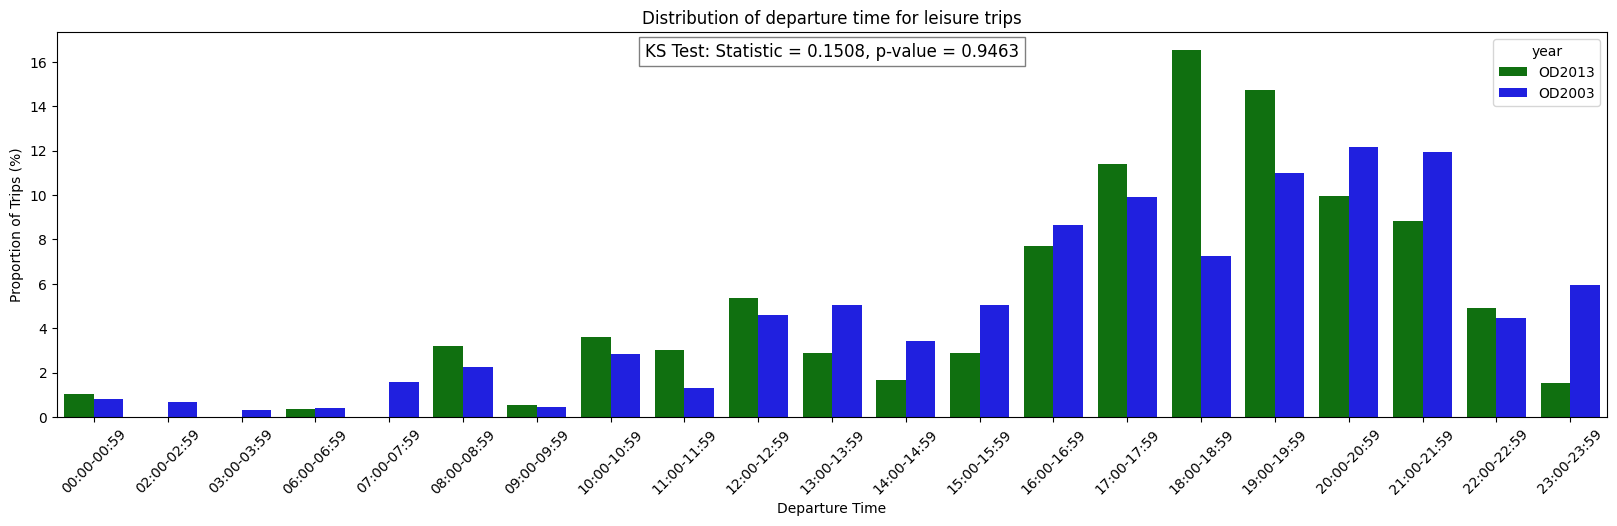

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

def calculate_weighted_proportions(df):
    df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
    weighted_counts = df.groupby('Hourly_Interval')['FACPER'].sum()
    total_weight = df['FACPER'].sum()
    weighted_proportions = weighted_counts / total_weight
    return weighted_proportions.reset_index(name='Weighted_Proportion')

# Calculate weighted proportions for each DataFrame
weighted_proportions_13 = calculate_weighted_proportions(od13_mtcentre_w20_25f4)
weighted_proportions_13['DataFrame'] = 'OD2013'

weighted_proportions_03 = calculate_weighted_proportions(od03_mtcentre_w20_25f4)
weighted_proportions_03['DataFrame'] = 'OD2003'

# Combine the results
combined_proportions = pd.concat([weighted_proportions_13, weighted_proportions_03])

# Sort by 'Hourly_Interval'
combined_proportions = combined_proportions.sort_values('Hourly_Interval')

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])
combined_proportions['Weighted_Proportion']=combined_proportions['Weighted_Proportion']*100

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions, x='Hourly_Interval', y='Weighted_Proportion', hue='DataFrame', palette={'OD2013': 'green', 'OD2003': 'blue'})

# Set title and labels
plt.title('Distribution of departure time for leisure trips')


# Set x-axis and y-axis labels
plt.xlabel("Departure Time")  # Set x-axis label
plt.ylabel("Proportion of Trips (%)")  # Set y-axis labelplt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(loc='upper right', title='year')
plt.xticks(rotation=45)

# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## Seg A Montreal 2003 vs 2013 Motif 6 Shopping

<ipython-input-236-071ec342db45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-236-071ec342db45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


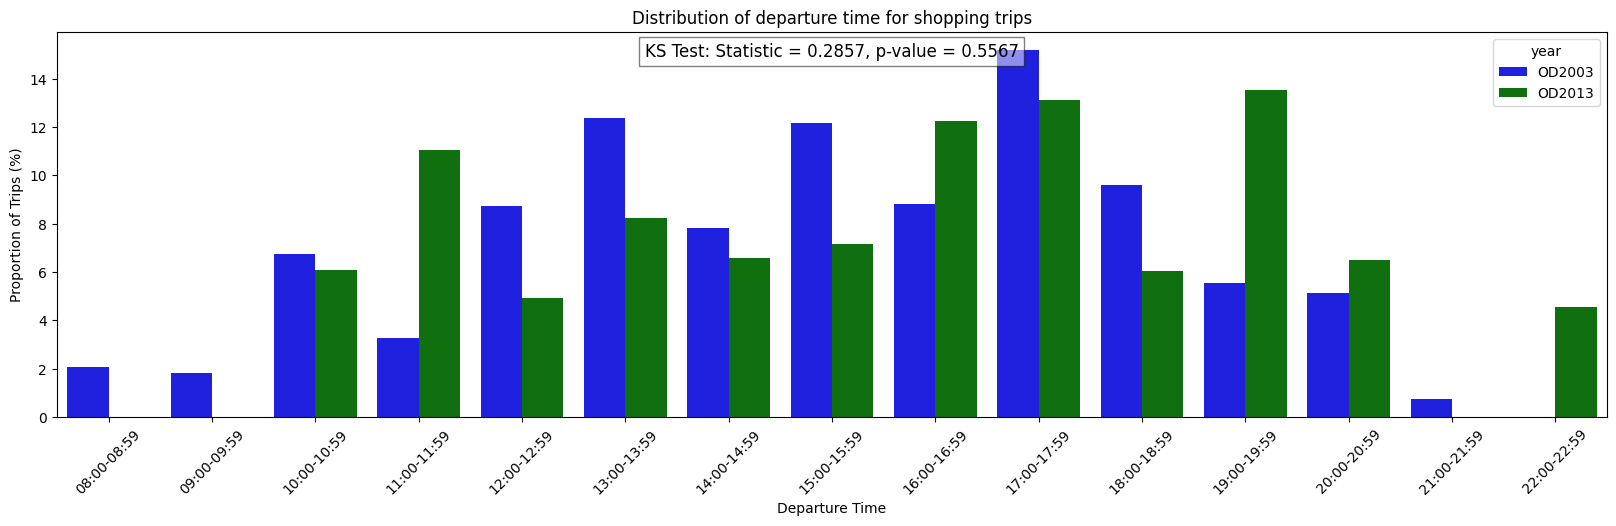

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def convert_to_hourly_interval(time_object):
    # Extract the hour part and format it as a time interval
    return f'{time_object.hour:02d}:00-{time_object.hour:02d}:59'

def calculate_weighted_proportions(df):
    df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
    weighted_counts = df.groupby('Hourly_Interval')['FACPER'].sum()
    total_weight = df['FACPER'].sum()
    weighted_proportions = weighted_counts / total_weight
    return weighted_proportions.reset_index(name='Weighted_Proportion')

# Calculate weighted proportions for each DataFrame
weighted_proportions_13 = calculate_weighted_proportions(od13_mtcentre_w20_25f5)
weighted_proportions_13['DataFrame'] = 'OD2013'

weighted_proportions_03 = calculate_weighted_proportions(od03_mtcentre_w20_25f5)
weighted_proportions_03['DataFrame'] = 'OD2003'

# Combine the results
combined_proportions = pd.concat([weighted_proportions_13, weighted_proportions_03])

# Sort by 'Hourly_Interval'
combined_proportions = combined_proportions.sort_values('Hourly_Interval')

# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])
combined_proportions['Weighted_Proportion']=combined_proportions['Weighted_Proportion']*100

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions, x='Hourly_Interval', y='Weighted_Proportion', hue='DataFrame', palette={'OD2013': 'green', 'OD2003': 'blue'})

# Set title and labels
plt.title('Distribution of departure time for shopping trips')

# Set x-axis and y-axis labels
plt.xlabel("Departure Time")  # Set x-axis label
plt.ylabel("Proportion of Trips (%)")  # Set y-axis labelplt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(loc='upper right', title='year')
plt.xticks(rotation=45)

# Annotate with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## KS test

For estimating the KS each step is necessary.Just change the input value.

In [306]:
od13_mtllaval_w20_25['DEPARTURE'] = convert_time_column(od13_mtllaval_w20_25, 'HREDE')
od03_mtllaval_w20_25['DEPARTURE'] = convert_time_column(od03_mtllaval_w20_25, 'HREDE')
od13_mtllaval_w26_30['DEPARTURE'] = convert_time_column(od13_mtllaval_w26_30, 'HREDE')
od03_mtllaval_w26_30['DEPARTURE'] = convert_time_column(od03_mtllaval_w26_30, 'HREDE')
od03_mtcentre_w26_30['DEPARTURE'] = convert_time_column(od03_mtcentre_w26_30, 'HREDE')
od13_mtcentre_w26_30['DEPARTURE'] = convert_time_column(od13_mtcentre_w26_30, 'HREDE')


<ipython-input-306-761e4905bb7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od13_mtllaval_w20_25['DEPARTURE'] = convert_time_column(od13_mtllaval_w20_25, 'HREDE')
<ipython-input-306-761e4905bb7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od03_mtllaval_w20_25['DEPARTURE'] = convert_time_column(od03_mtllaval_w20_25, 'HREDE')
<ipython-input-306-761e4905bb7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [315]:
weighted_proportions_13 = calculate_weighted_proportions(od03_mtcentre_w26_30[(od03_mtcentre_w26_30["MOTIF"] == 6)])
weighted_proportions_03 = calculate_weighted_proportions(od13_mtcentre_w26_30[(od13_mtcentre_w26_30["MOTIF"] == 6)])


<ipython-input-236-071ec342db45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-236-071ec342db45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


In [533]:
weighted_proportions_13 = calculate_weighted_proportions(od03_mtllaval_w20_25[(od03_mtllaval_w20_25["MOTIF"] == 1)])
weighted_proportions_03 = calculate_weighted_proportions(od03_mtllaval_w26_30[(od03_mtllaval_w26_30["MOTIF"] == 1)])


<ipython-input-236-071ec342db45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-236-071ec342db45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


In [553]:
weighted_proportions_13 = calculate_weighted_proportions(od03_mtcentre_w20_25[(od03_mtcentre_w20_25["MOTIF"] == 1)])
weighted_proportions_03 = calculate_weighted_proportions(od03_mtllaval_w26_30[(od03_mtllaval_w26_30["MOTIF"] == 1)])


<ipython-input-236-071ec342db45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)
<ipython-input-236-071ec342db45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly_Interval'] = df['DEPARTURE'].apply(convert_to_hourly_interval)


In [554]:
ks_2samp(weighted_proportions_13['Weighted_Proportion'], weighted_proportions_03['Weighted_Proportion'])


KstestResult(statistic=0.43137254901960786, pvalue=0.07358054490015886, statistic_location=0.019874598153995428, statistic_sign=-1)

# Activity duration

Focusing on the timeframe from 5 AM to 2 PM (14 PM), the study narrows down to trips commencing within the peak departure time range. This approach enables the creation of graphical representations showcasing the duration of various activities. For each selected trip, the departure time of an individual's subsequent trip is considered as the 'end time' of the current trip. Essentially, a trip is deemed to conclude when the next one commences.

This method, while practical, does integrate travel time into the calculation of activity duration. This inclusion is a limitation imposed by the data constraints of the Origin-Destination surveys, which do not provide separate information for travel time. Consequently, the activity durations computed in this manner will encompass both the time spent on the actual activity and the time spent traveling to the next activity. Despite this limitation, the approach provides valuable insights into the daily activity patterns within the selected time range.

In [118]:
import pandas as pd
import datetime

def time_to_datetime(time_obj):
    # Convert time to datetime object with a fixed date
    return datetime.datetime.combine(datetime.date.today(), time_obj)

def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'ID' and calculate the time difference
time_diffs = filtered_df.groupby('person')['DEPARTURE'].apply(calculate_time_diff)

# Drop NaT values which represent groups with only one record
time_diffs = time_diffs.dropna()

print(time_diffs)


person
10003683    105.0
10063943    315.0
10070292    120.0
10075681    198.0
10104752    320.0
            ...  
90115681    270.0
90126842    120.0
90221571    195.0
90237833    420.0
90326111     45.0
Name: DEPARTURE, Length: 199, dtype: object


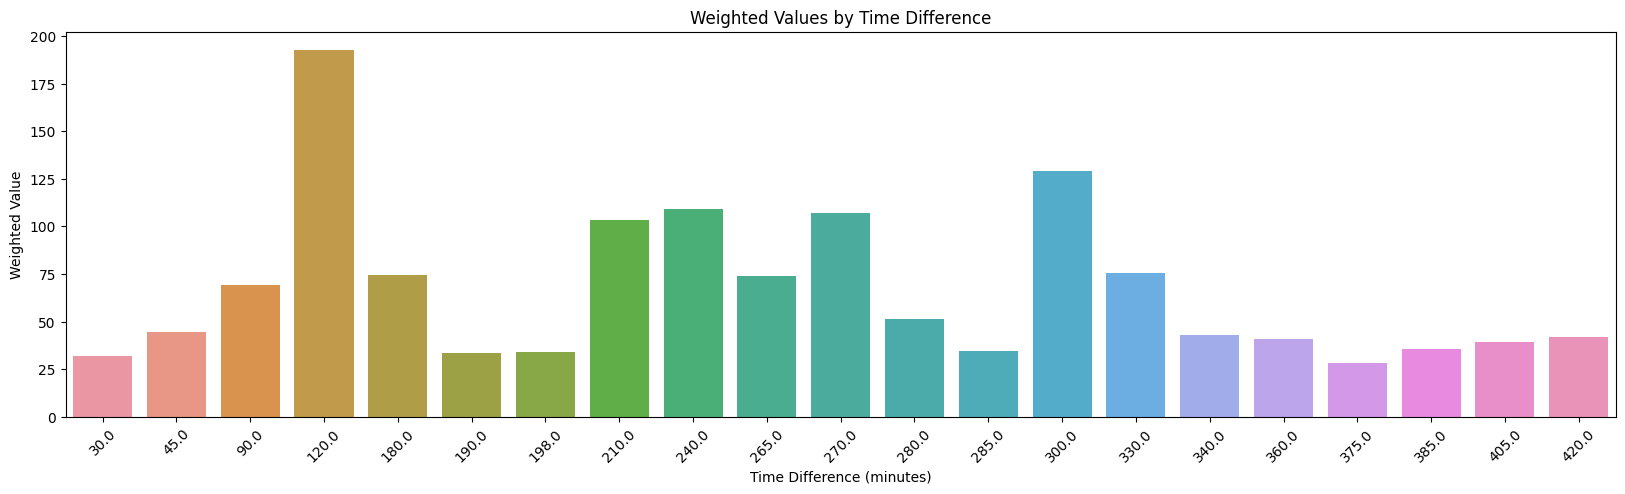

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming od13_mtcentre_w20_25f is the original DataFrame
# and time_diffs is a Series with 'person' as index and calculated time differences as values

# Merge time_diffs with the original DataFrame
merged_df = od13_mtcentre_w20_25f.merge(time_diffs, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum or average
grouped = merged_df.groupby('DEPARTURE_y')['FACPER'].sum()  # Replace 'sum' with 'mean' if average is preferred

# Reset index for plotting
grouped_df = grouped.reset_index()
grouped_df.columns = ['Time_Difference', 'Weighted_Value']

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=grouped_df, x='Time_Difference', y='Weighted_Value')

# Set title and labels
plt.title('Weighted Values by Time Difference')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Weighted Value')
plt.xticks(rotation=45)

plt.show()


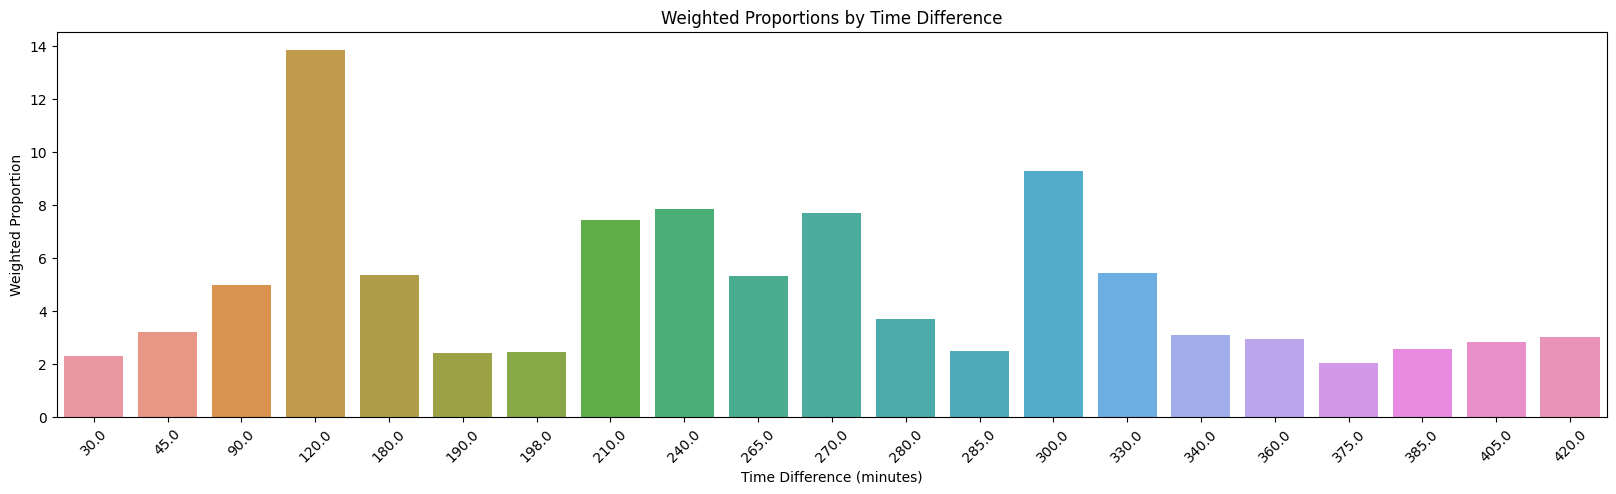

In [209]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs = filtered_df.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Merge time_diffs with the original DataFrame
merged_df = od13_mtcentre_w20_25f.merge(time_diffs, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum = merged_df.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value = merged_df['FACPER'].sum()

# Calculate proportions
grouped_proportions = grouped_sum / total_weighted_value
grouped_proportions_df = grouped_proportions.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df['Weighted_Proportion']=grouped_proportions_df['Weighted_Proportion']*100
# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=grouped_proportions_df, x='Time_Difference', y='Weighted_Proportion')

# Set title and labels
plt.title('Weighted Proportions by Time Difference')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Weighted Proportion')
plt.xticks(rotation=45)

plt.show()


## Activity duration work

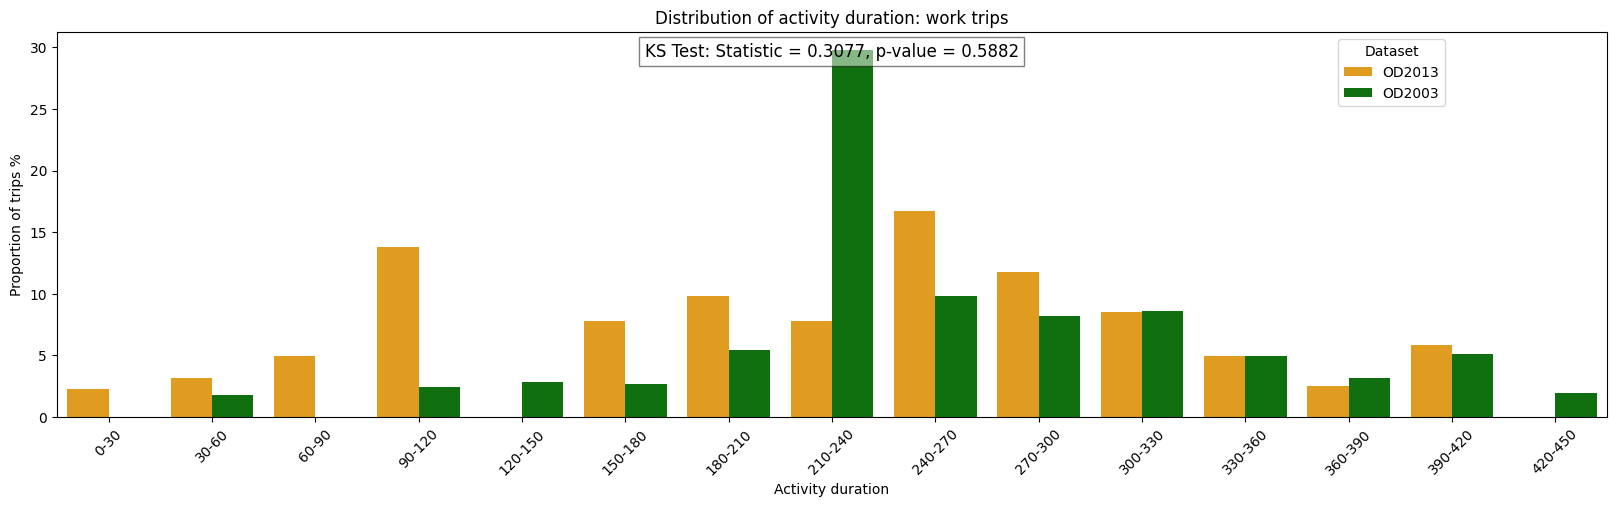

In [257]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Function to round time differences to nearest 30 minutes
def round_to_nearest_30(minutes):
    rounded = round(minutes / 30) * 30
    interval_start = rounded - 30 if rounded > 0 else 0
    interval_end = rounded
    return f"{interval_start}-{interval_end}"


# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df1 = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Apply rounding to the time differences
time_diffs1_rounded = time_diffs1.apply(round_to_nearest_30)
time_diffs2_rounded = time_diffs2.apply(round_to_nearest_30)

# Merge time_diffs with the original DataFrame
merged_df1 = od13_mtcentre_w20_25f.merge(time_diffs1_rounded, left_on='person', right_index=True)
merged_df2 = od03_mtcentre_w20_25f.merge(time_diffs2_rounded, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value1 = merged_df1['FACPER'].sum()
total_weighted_value2 = merged_df1['FACPER'].sum()

# Calculate proportions
grouped_proportions1 = grouped_sum1 / total_weighted_value1
grouped_proportions2 = grouped_sum2 / total_weighted_value2

grouped_proportions_df1 = grouped_proportions1.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df2 = grouped_proportions2.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Add identifier columns
grouped_proportions_df1['Dataset'] = 'OD2013'
grouped_proportions_df2['Dataset'] = 'OD2003'

# Combine the two DataFrames
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference')

def custom_sort(time_diff):
    return int(time_diff.split('-')[0])

# Apply the custom sorting to your DataFrames
grouped_proportions_df1['Time_Difference_Sort'] = grouped_proportions_df1['Time_Difference'].apply(custom_sort)
grouped_proportions_df2['Time_Difference_Sort'] = grouped_proportions_df2['Time_Difference'].apply(custom_sort)

# Sort the DataFrames based on the new sorting column
grouped_proportions_df1 = grouped_proportions_df1.sort_values('Time_Difference_Sort')
grouped_proportions_df2 = grouped_proportions_df2.sort_values('Time_Difference_Sort')

# Combine the two DataFrames again
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference_Sort')
combined_proportions_df['Weighted_Proportion']=combined_proportions_df['Weighted_Proportion']*100


# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions_df, x='Time_Difference', y='Weighted_Proportion', hue='Dataset', palette={'OD2013': 'orange', 'OD2003': 'green'})
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(grouped_proportions_df1['Weighted_Proportion'], grouped_proportions_df2['Weighted_Proportion'])

# Annotate plot with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Distribution of activity duration: work trips')
plt.xlabel('Activity duration')
plt.ylabel('Proportion of trips %')
plt.xticks(rotation=45)

plt.legend(title='Dataset',bbox_to_anchor=(0.9, 1))
plt.show()


## Activity duration Study

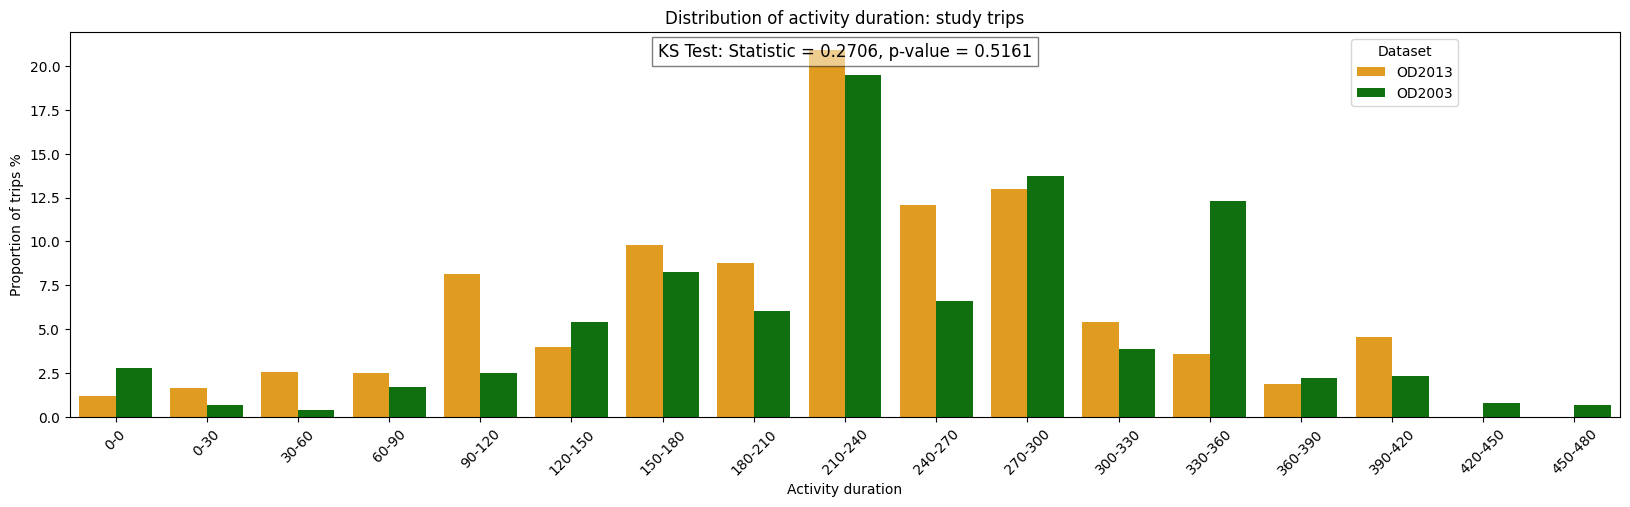

In [256]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Function to round time differences to nearest 30 minutes
def round_to_nearest_30(minutes):
    rounded = round(minutes / 30) * 30
    interval_start = rounded - 30 if rounded > 0 else 0
    interval_end = rounded
    return f"{interval_start}-{interval_end}"


# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df1 = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Apply rounding to the time differences
time_diffs1_rounded = time_diffs1.apply(round_to_nearest_30)
time_diffs2_rounded = time_diffs2.apply(round_to_nearest_30)

# Merge time_diffs with the original DataFrame
merged_df1 = od13_mtcentre_w20_25f2.merge(time_diffs1_rounded, left_on='person', right_index=True)
merged_df2 = od03_mtcentre_w20_25f2.merge(time_diffs2_rounded, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value1 = merged_df1['FACPER'].sum()
total_weighted_value2 = merged_df1['FACPER'].sum()

# Calculate proportions
grouped_proportions1 = grouped_sum1 / total_weighted_value1
grouped_proportions2 = grouped_sum2 / total_weighted_value2

grouped_proportions_df1 = grouped_proportions1.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df2 = grouped_proportions2.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Add identifier columns
grouped_proportions_df1['Dataset'] = 'OD2013'
grouped_proportions_df2['Dataset'] = 'OD2003'

# Combine the two DataFrames
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference')

def custom_sort(time_diff):
    return int(time_diff.split('-')[0])

# Apply the custom sorting to your DataFrames
grouped_proportions_df1['Time_Difference_Sort'] = grouped_proportions_df1['Time_Difference'].apply(custom_sort)
grouped_proportions_df2['Time_Difference_Sort'] = grouped_proportions_df2['Time_Difference'].apply(custom_sort)

# Sort the DataFrames based on the new sorting column
grouped_proportions_df1 = grouped_proportions_df1.sort_values('Time_Difference_Sort')
grouped_proportions_df2 = grouped_proportions_df2.sort_values('Time_Difference_Sort')

# Combine the two DataFrames again
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference_Sort')
combined_proportions_df['Weighted_Proportion']=combined_proportions_df['Weighted_Proportion']*100


# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions_df, x='Time_Difference', y='Weighted_Proportion', hue='Dataset', palette={'OD2013': 'orange', 'OD2003': 'green'})
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(grouped_proportions_df1['Weighted_Proportion'], grouped_proportions_df2['Weighted_Proportion'])
# Annotate plot with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Distribution of activity duration: study trips')
plt.xlabel('Activity duration')
plt.ylabel('Proportion of trips %')
plt.xticks(rotation=45)

plt.legend(title='Dataset',bbox_to_anchor=(0.9, 1))
plt.show()


## Activity duration other trips

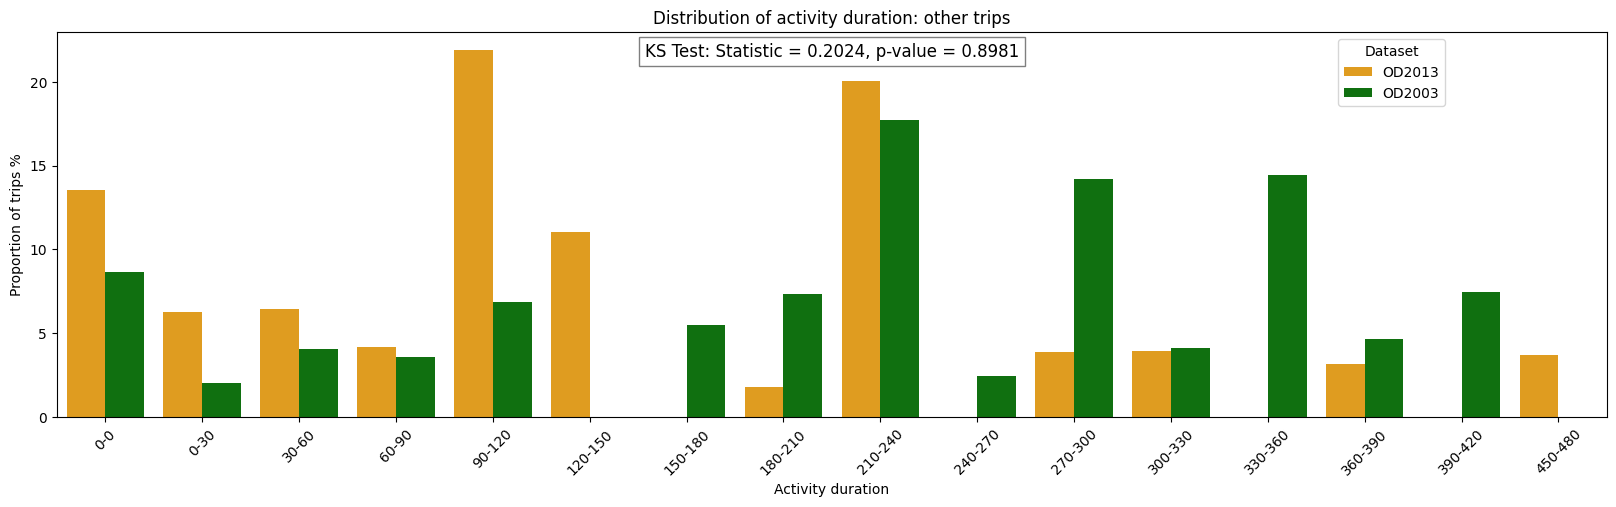

In [255]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Function to round time differences to nearest 30 minutes
def round_to_nearest_30(minutes):
    rounded = round(minutes / 30) * 30
    interval_start = rounded - 30 if rounded > 0 else 0
    interval_end = rounded
    return f"{interval_start}-{interval_end}"


# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df1 = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Apply rounding to the time differences
time_diffs1_rounded = time_diffs1.apply(round_to_nearest_30)
time_diffs2_rounded = time_diffs2.apply(round_to_nearest_30)

# Merge time_diffs with the original DataFrame
merged_df1 = od13_mtcentre_w20_25f6.merge(time_diffs1_rounded, left_on='person', right_index=True)
merged_df2 = od03_mtcentre_w20_25f6.merge(time_diffs2_rounded, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value1 = merged_df1['FACPER'].sum()
total_weighted_value2 = merged_df1['FACPER'].sum()

# Calculate proportions
grouped_proportions1 = grouped_sum1 / total_weighted_value1
grouped_proportions2 = grouped_sum2 / total_weighted_value2

grouped_proportions_df1 = grouped_proportions1.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df2 = grouped_proportions2.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Add identifier columns
grouped_proportions_df1['Dataset'] = 'OD2013'
grouped_proportions_df2['Dataset'] = 'OD2003'

# Combine the two DataFrames
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference')

def custom_sort(time_diff):
    return int(time_diff.split('-')[0])

# Apply the custom sorting to your DataFrames
grouped_proportions_df1['Time_Difference_Sort'] = grouped_proportions_df1['Time_Difference'].apply(custom_sort)
grouped_proportions_df2['Time_Difference_Sort'] = grouped_proportions_df2['Time_Difference'].apply(custom_sort)

# Sort the DataFrames based on the new sorting column
grouped_proportions_df1 = grouped_proportions_df1.sort_values('Time_Difference_Sort')
grouped_proportions_df2 = grouped_proportions_df2.sort_values('Time_Difference_Sort')

# Combine the two DataFrames again
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference_Sort')

combined_proportions_df['Weighted_Proportion']=combined_proportions_df['Weighted_Proportion']*100

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions_df, x='Time_Difference', y='Weighted_Proportion', hue='Dataset', palette={'OD2013': 'orange', 'OD2003': 'green'})
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(grouped_proportions_df1['Weighted_Proportion'], grouped_proportions_df2['Weighted_Proportion'])
# Annotate plot with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Distribution of activity duration: other trips')
plt.xlabel('Activity duration')
plt.ylabel('Proportion of trips %')
plt.xticks(rotation=45)

plt.legend(title='Dataset',bbox_to_anchor=(0.9, 1))
plt.show()


## Activity duration Leisure

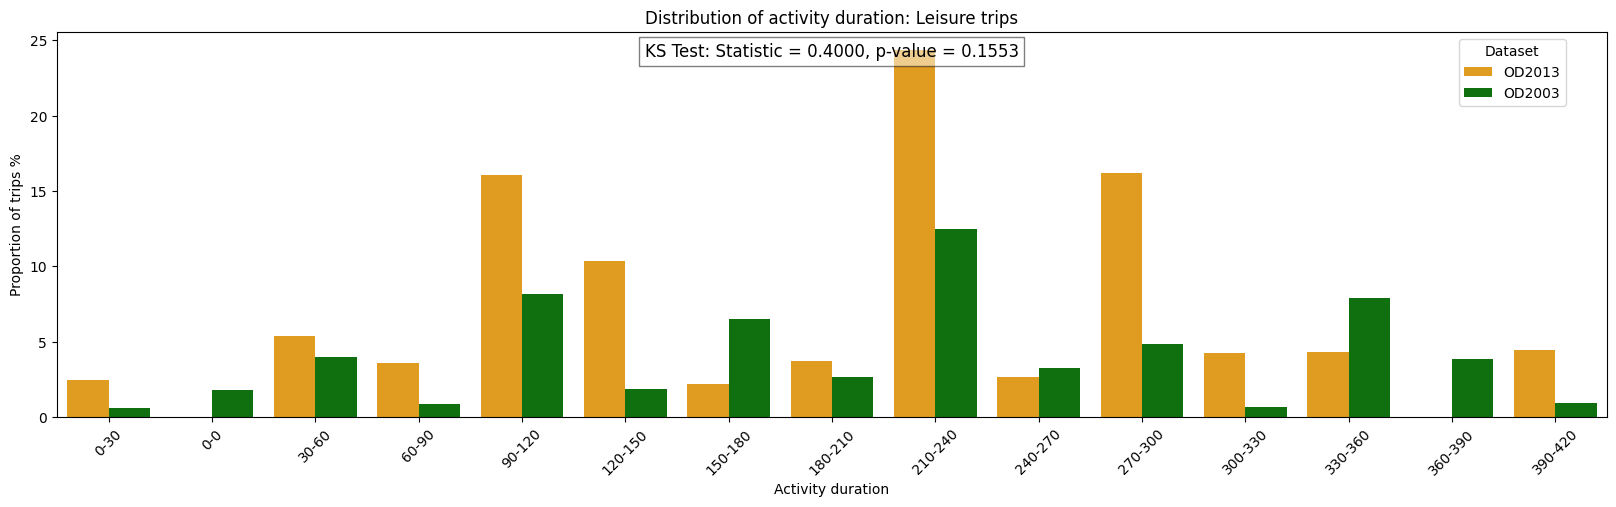

In [258]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Function to round time differences to nearest 30 minutes
def round_to_nearest_30(minutes):
    rounded = round(minutes / 30) * 30
    interval_start = rounded - 30 if rounded > 0 else 0
    interval_end = rounded
    return f"{interval_start}-{interval_end}"


# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df1 = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Apply rounding to the time differences
time_diffs1_rounded = time_diffs1.apply(round_to_nearest_30)
time_diffs2_rounded = time_diffs2.apply(round_to_nearest_30)

# Merge time_diffs with the original DataFrame
merged_df1 = od13_mtcentre_w20_25f4.merge(time_diffs1_rounded, left_on='person', right_index=True)
merged_df2 = od03_mtcentre_w20_25f4.merge(time_diffs2_rounded, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value1 = merged_df1['FACPER'].sum()
total_weighted_value2 = merged_df1['FACPER'].sum()

# Calculate proportions
grouped_proportions1 = grouped_sum1 / total_weighted_value1
grouped_proportions2 = grouped_sum2 / total_weighted_value2

grouped_proportions_df1 = grouped_proportions1.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df2 = grouped_proportions2.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Add identifier columns
grouped_proportions_df1['Dataset'] = 'OD2013'
grouped_proportions_df2['Dataset'] = 'OD2003'

# Combine the two DataFrames
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference')

def custom_sort(time_diff):
    return int(time_diff.split('-')[0])

# Apply the custom sorting to your DataFrames
grouped_proportions_df1['Time_Difference_Sort'] = grouped_proportions_df1['Time_Difference'].apply(custom_sort)
grouped_proportions_df2['Time_Difference_Sort'] = grouped_proportions_df2['Time_Difference'].apply(custom_sort)

# Sort the DataFrames based on the new sorting column
grouped_proportions_df1 = grouped_proportions_df1.sort_values('Time_Difference_Sort')
grouped_proportions_df2 = grouped_proportions_df2.sort_values('Time_Difference_Sort')

# Combine the two DataFrames again
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference_Sort')

combined_proportions_df['Weighted_Proportion']=combined_proportions_df['Weighted_Proportion']*100

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions_df, x='Time_Difference', y='Weighted_Proportion', hue='Dataset', palette={'OD2013': 'orange', 'OD2003': 'green'})
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(grouped_proportions_df1['Weighted_Proportion'], grouped_proportions_df2['Weighted_Proportion'])
# Annotate plot with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Distribution of activity duration: Leisure trips')
plt.xlabel('Activity duration')
plt.ylabel('Proportion of trips %')
plt.xticks(rotation=45)

plt.legend(title='Dataset',bbox_to_anchor=(0.9, 1))
plt.show()


## Activity duration shopping

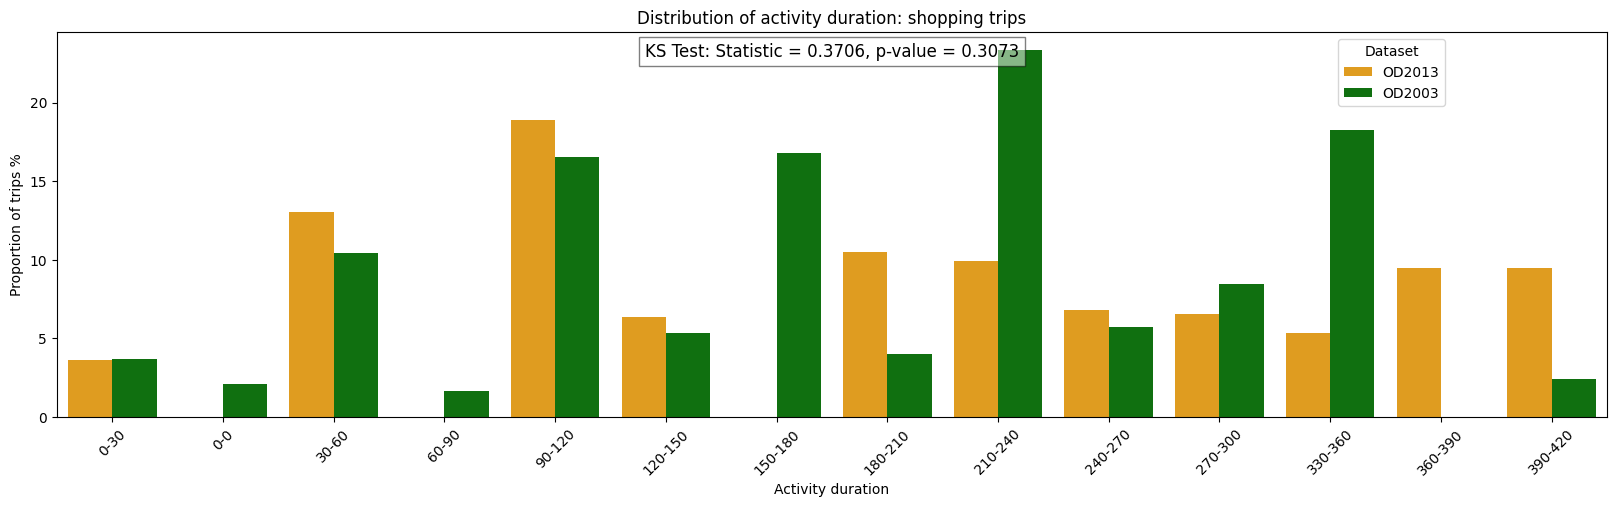

In [259]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Function to round time differences to nearest 30 minutes
def round_to_nearest_30(minutes):
    rounded = round(minutes / 30) * 30
    interval_start = rounded - 30 if rounded > 0 else 0
    interval_end = rounded
    return f"{interval_start}-{interval_end}"


# Convert time to datetime object with a fixed date
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

# Calculate time difference for each group
def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

# Filter for times between 5 AM and 2 PM
filtered_df1 = od13_mtcentre_w20_25[od13_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od03_mtcentre_w20_25[od03_mtcentre_w20_25['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

# Apply rounding to the time differences
time_diffs1_rounded = time_diffs1.apply(round_to_nearest_30)
time_diffs2_rounded = time_diffs2.apply(round_to_nearest_30)

# Merge time_diffs with the original DataFrame
merged_df1 = od13_mtcentre_w20_25f5.merge(time_diffs1_rounded, left_on='person', right_index=True)
merged_df2 = od03_mtcentre_w20_25f5.merge(time_diffs2_rounded, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

# Calculate the total of all weighted values
total_weighted_value1 = merged_df1['FACPER'].sum()
total_weighted_value2 = merged_df1['FACPER'].sum()

# Calculate proportions
grouped_proportions1 = grouped_sum1 / total_weighted_value1
grouped_proportions2 = grouped_sum2 / total_weighted_value2

grouped_proportions_df1 = grouped_proportions1.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})
grouped_proportions_df2 = grouped_proportions2.reset_index().rename(columns={'DEPARTURE_y': 'Time_Difference', 'FACPER': 'Weighted_Proportion'})

# Add identifier columns
grouped_proportions_df1['Dataset'] = 'OD2013'
grouped_proportions_df2['Dataset'] = 'OD2003'

# Combine the two DataFrames
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference')

def custom_sort(time_diff):
    return int(time_diff.split('-')[0])

# Apply the custom sorting to your DataFrames
grouped_proportions_df1['Time_Difference_Sort'] = grouped_proportions_df1['Time_Difference'].apply(custom_sort)
grouped_proportions_df2['Time_Difference_Sort'] = grouped_proportions_df2['Time_Difference'].apply(custom_sort)

# Sort the DataFrames based on the new sorting column
grouped_proportions_df1 = grouped_proportions_df1.sort_values('Time_Difference_Sort')
grouped_proportions_df2 = grouped_proportions_df2.sort_values('Time_Difference_Sort')

# Combine the two DataFrames again
combined_proportions_df = pd.concat([grouped_proportions_df1, grouped_proportions_df2])
combined_proportions_df = combined_proportions_df.sort_values('Time_Difference_Sort')

combined_proportions_df['Weighted_Proportion']=combined_proportions_df['Weighted_Proportion']*100

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(data=combined_proportions_df, x='Time_Difference', y='Weighted_Proportion', hue='Dataset', palette={'OD2013': 'orange', 'OD2003': 'green'})
# Perform KS Test
ks_statistic, ks_p_value = ks_2samp(grouped_proportions_df1['Weighted_Proportion'], grouped_proportions_df2['Weighted_Proportion'])
# Annotate plot with KS Test result
plt.text(0.5, 0.95, f'KS Test: Statistic = {ks_statistic:.4f}, p-value = {ks_p_value:.4g}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Distribution of activity duration: shopping trips')
plt.xlabel('Activity duration')
plt.ylabel('Proportion of trips %')
plt.xticks(rotation=45)

plt.legend(title='Dataset',bbox_to_anchor=(0.9, 1))
plt.show()


## KS test

For estimating the KS each step is necessary.Just change the input value.

In [586]:
# Filter for times between 5 AM and 2 PM
filtered_df1 = od03_mtcentre_w26_30[od03_mtcentre_w26_30['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
filtered_df2 = od13_mtcentre_w26_30[od13_mtcentre_w26_30['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

# Group by 'person' and calculate the time difference
time_diffs1 = filtered_df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
time_diffs2 = filtered_df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

merged_df1 = od03_mtcentre_w26_30[(od03_mtcentre_w26_30["MOTIF"] == 4)].merge(time_diffs1, left_on='person', right_index=True)
merged_df2 =  od13_mtcentre_w26_30[(od13_mtcentre_w26_30["MOTIF"] == 4)].merge(time_diffs2, left_on='person', right_index=True)

# Group by time difference and calculate weighted sum
grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

In [620]:

import pandas as pd
import datetime
from scipy.stats import ks_2samp
from itertools import combinations

def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

def calculate_time_diff(group):
    if len(group) > 1:
        datetime_group = group.apply(time_to_datetime)
        return (datetime_group.max() - datetime_group.min()).seconds / 60  # Convert to minutes
    return pd.NaT

def process_datasets(df1, df2, motif_values):

    df1 = df1[df1['MOTIF'].isin(motif_values)]
    df2 = df2[df2['MOTIF'].isin(motif_values)]
    # Filter for times between 5 AM and 2 PM
    df1 = df1[df1['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]
    df2 = df2[df2['DEPARTURE'].apply(lambda x: x >= datetime.time(5, 0) and x <= datetime.time(14, 0))]

    # Group by 'person' and calculate the time difference
    time_diffs1 = df1.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()
    time_diffs2 = df2.groupby('person')['DEPARTURE'].apply(calculate_time_diff).dropna()

    # Merge with original dataframes
    merged_df1 = df1.merge(time_diffs1, left_on='person', right_index=True)
    merged_df2 = df2.merge(time_diffs2, left_on='person', right_index=True)

    # Group by time difference and calculate weighted sum
    grouped_sum1 = merged_df1.groupby('DEPARTURE_y')['FACPER'].sum()
    grouped_sum2 = merged_df2.groupby('DEPARTURE_y')['FACPER'].sum()

    # Perform KS Test
    ks_statistic, ks_p_value = ks_2samp(grouped_sum1, grouped_sum2)

    return ks_p_value

# List of datasets
datasets = [od03_mtllaval_w20_25, od13_mtllaval_w20_25, od13_mtcentre_w20_25, od03_mtcentre_w20_25, od13_mtcentre_w26_30, od03_mtcentre_w26_30, od13_mtllaval_w26_30, od03_mtllaval_w26_30]
# Assigning names to each DataFrame
od03_mtllaval_w20_25.name = 'od03_mtllaval_w20_25'
od13_mtllaval_w20_25.name = 'od13_mtllaval_w20_25'
od13_mtcentre_w20_25.name = 'od13_mtcentre_w20_25'
od03_mtcentre_w20_25.name = 'od03_mtcentre_w20_25'
od13_mtcentre_w26_30.name = 'od13_mtcentre_w26_30'
od03_mtcentre_w26_30.name = 'od03_mtcentre_w26_30'
od13_mtllaval_w26_30.name = 'od13_mtllaval_w26_30'
od03_mtllaval_w26_30.name = 'od03_mtllaval_w26_30'

# MOTIF values to filter
motif_values = [1, 2, 4, 5, 6]

# Calculate p-values for all combinations
results = []
for df1, df2 in combinations(datasets, 2):
      p_value = process_datasets(df1, df2, motif_values)
      results.append({'Dataset1': df1.name, 'Dataset2': df2.name,'MOTIF': motif_values, 'p_value': p_value})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                Dataset1              Dataset2   MOTIF   p_value
0   od03_mtllaval_w20_25  od13_mtllaval_w20_25  [1, 2]  0.916084
1   od03_mtllaval_w20_25  od13_mtcentre_w20_25  [1, 2]  0.076496
2   od03_mtllaval_w20_25  od03_mtcentre_w20_25  [1, 2]  0.060924
3   od03_mtllaval_w20_25  od13_mtcentre_w26_30  [1, 2]  0.026568
4   od03_mtllaval_w20_25  od03_mtcentre_w26_30  [1, 2]  0.388373
5   od03_mtllaval_w20_25  od13_mtllaval_w26_30  [1, 2]  0.142857
6   od03_mtllaval_w20_25  od03_mtllaval_w26_30  [1, 2]  0.737374
7   od13_mtllaval_w20_25  od13_mtcentre_w20_25  [1, 2]  0.033670
8   od13_mtllaval_w20_25  od03_mtcentre_w20_25  [1, 2]  0.053182
9   od13_mtllaval_w20_25  od13_mtcentre_w26_30  [1, 2]  0.033670
10  od13_mtllaval_w20_25  od03_mtcentre_w26_30  [1, 2]  0.655583
11  od13_mtllaval_w20_25  od13_mtllaval_w26_30  [1, 2]  0.303030
12  od13_mtllaval_w20_25  od03_mtllaval_w26_30  [1, 2]  0.798601
13  od13_mtcentre_w20_25  od03_mtcentre_w20_25  [1, 2]  0.081130
14  od13_mtcentre_w20_25 

# Activity system

In [423]:
ds=pd.DataFrame()
ds =pd.get_dummies(od13_mtcentre_w20_25['MOTIF'])
ds['FACPER'] =od13_mtcentre_w20_25['FACPER']
ds['person'] =od13_mtcentre_w20_25['person']


In [424]:
ds

,1,2,3,4,5,6,7,8,FACPER,person
196,0,1,0,0,0,0,0,0,29.92,10003683
197,0,0,1,0,0,0,0,0,29.92,10003683
447,0,1,0,0,0,0,0,0,32.49,10010662
448,0,0,1,0,0,0,0,0,32.49,10010662
591,0,1,0,0,0,0,0,0,33.45,10014271
...,...,...,...,...,...,...,...,...,...,...
110011,0,0,1,0,0,0,0,0,44.61,90326111
110012,1,0,0,0,0,0,0,0,44.61,90326111
110013,0,0,1,0,0,0,0,0,44.61,90326111
110021,0,0,0,1,0,0,0,0,41.04,90335101


In [425]:
ds = ds.drop(ds.columns[[2, 6, 7]], axis=1)


In [437]:
ds



,1,2,4,5,6,FACPER,person
196,0,1,0,0,0,29.92,10003683
197,0,0,0,0,0,29.92,10003683
447,0,1,0,0,0,32.49,10010662
448,0,0,0,0,0,32.49,10010662
591,0,1,0,0,0,33.45,10014271
...,...,...,...,...,...,...,...
110011,0,0,0,0,0,44.61,90326111
110012,1,0,0,0,0,44.61,90326111
110013,0,0,0,0,0,44.61,90326111
110021,0,0,1,0,0,41.04,90335101


In [451]:
grouped2 = ds.groupby('person').sum()


In [452]:
grouped2=grouped2.reset_index()


In [444]:
grouped2

,person,1,2,4,5,6,FACPER
0,10003683,0,1,0,0,0,59.84
1,10010662,0,1,0,0,0,64.98
2,10014271,0,1,0,0,0,66.90
3,10021613,0,1,0,0,0,66.10
4,10022353,0,1,0,0,0,59.54
...,...,...,...,...,...,...,...
813,90221571,0,1,0,0,0,83.20
814,90221575,0,1,0,0,0,83.20
815,90237833,0,1,0,0,0,88.54
816,90326111,1,0,0,1,0,178.44


In [453]:
grouped2 = grouped2.drop(grouped2.columns[[0]], axis=1)


In [454]:
grouped2

,1,2,4,5,6,FACPER
0,0,1,0,0,0,59.84
1,0,1,0,0,0,64.98
2,0,1,0,0,0,66.90
3,0,1,0,0,0,66.10
4,0,1,0,0,0,59.54
...,...,...,...,...,...,...
813,0,1,0,0,0,83.20
814,0,1,0,0,0,83.20
815,0,1,0,0,0,88.54
816,1,0,0,1,0,178.44


In [469]:
grouped2.iloc[:, 0:5] = grouped2.iloc[:, 0:5].applymap(lambda x: 1 if x > 1 else x)


<ipython-input-469-db5310b36c02>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  grouped2.iloc[:, 0:5] = grouped2.iloc[:, 0:5].applymap(lambda x: 1 if x > 1 else x)


In [470]:
grouped2

,1,2,4,5,6,FACPER
0,0,1,0,0,0,59.84
1,0,1,0,0,0,64.98
2,0,1,0,0,0,66.90
3,0,1,0,0,0,66.10
4,0,1,0,0,0,59.54
...,...,...,...,...,...,...
813,0,1,0,0,0,83.20
814,0,1,0,0,0,83.20
815,0,1,0,0,0,88.54
816,1,0,0,1,0,178.44


In [471]:
unique_rows = grouped2.iloc[:, 0:5].drop_duplicates()
unique_rows

,1,2,4,5,6
0,0,1,0,0,0
5,1,1,0,0,0
6,0,0,0,0,0
17,0,1,1,0,0
18,0,1,0,1,0
20,1,0,0,0,0
38,1,0,1,0,0
39,1,1,1,0,0
40,0,0,1,0,0
46,0,0,0,0,1


In [462]:
grouped.unique()

array([ 1,  2,  3,  5,  4, 10,  7, 12,  6])

In [477]:
total_fspar=sum(grouped2.iloc[:,5])


In [496]:
import pandas as pd
from itertools import product

def process_dataframe(df):
    try:
        # Filter the DataFrame for specific 'MOTIF' values
        filtered_df = df[df['MOTIF'].isin([1, 2, 4, 5, 6])]

        # Create dummy variables
        ds = pd.get_dummies(filtered_df['MOTIF'])
        ds['FACPER'] = filtered_df['FACPER']
        ds['person'] = filtered_df['person']

        # Group by 'person' and sum
        grouped2 = ds.groupby('person').sum().reset_index()
        grouped2 = grouped2.drop(grouped2.columns[[0]], axis=1)

        # Convert numbers greater than 1 to 1 in the first 5 columns
        for i in range(5):
            grouped2[grouped2.columns[i]] = grouped2.iloc[:, i].apply(lambda x: 1 if x > 1 else x)

        # Calculate total of the sixth column
        total_fspar = sum(grouped2.iloc[:, 5])

        # Explore all combinations of 0s and 1s in the first 5 columns and calculate percentages
        combinations_results = {}
        for combination in product([0, 1], repeat=5):
            mask = (grouped2.iloc[:, 0] == combination[0]) & \
                   (grouped2.iloc[:, 1] == combination[1]) & \
                   (grouped2.iloc[:, 2] == combination[2]) & \
                   (grouped2.iloc[:, 3] == combination[3]) & \
                   (grouped2.iloc[:, 4] == combination[4])
            combinations_sum = grouped2[mask].iloc[:, 5].sum()
            combinations_results[combination] = (combinations_sum / total_fspar) * 100

        # Sort the results by percentage in descending order
        sorted_results = dict(sorted(combinations_results.items(), key=lambda item: item[1], reverse=True))

        return total_fspar, sorted_results

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

# Usage
total_fspar, sorted_results = process_dataframe(od13_mtcentre_w20_25)

# Check if the function returned results
if total_fspar is not None and sorted_results is not None:
    # Process the results
    pass
else:
    print("An error occurred in processing the DataFrame.")


In [498]:
total_fspar, sorted_results = process_dataframe(od13_mtcentre_w20_25)


<ipython-input-496-ad35df1db74e>:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  grouped2.iloc[:, 0:5] = grouped2.iloc[:, 0:5].applymap(lambda x: 1 if x > 1 else x)


In [500]:
sorted_results

{(0, 1, 0, 0, 0): 37.88317154815274,
 (0, 1, 1, 0, 0): 16.480132465316522,
 (1, 1, 0, 0, 0): 8.265916936819098,
 (0, 1, 0, 1, 0): 5.222651360672729,
 (0, 0, 0, 0, 0): 4.501355002028974,
 (1, 0, 0, 0, 0): 3.742468839616061,
 (0, 0, 1, 0, 0): 2.947446546983621,
 (0, 1, 0, 0, 1): 2.7512417594880665,
 (0, 0, 1, 0, 1): 2.1542619171403343,
 (1, 0, 1, 0, 0): 2.093523047788422,
 (0, 0, 0, 0, 1): 1.8968519876448726,
 (1, 1, 1, 0, 0): 1.8115789486676332,
 (0, 1, 1, 0, 1): 1.4186756732257062,
 (0, 0, 0, 1, 1): 1.3434823517859824,
 (0, 1, 0, 1, 1): 1.1383772422743081,
 (1, 0, 0, 1, 0): 1.1168052753538844,
 (0, 0, 0, 1, 0): 0.9995514182848272,
 (1, 0, 0, 0, 1): 0.8839295154837492,
 (0, 1, 1, 1, 0): 0.7064716312178316,
 (0, 0, 1, 1, 1): 0.5929479553327263,
 (0, 1, 1, 1, 1): 0.5749964583849606,
 (0, 0, 1, 1, 0): 0.45979968652764164,
 (1, 1, 0, 0, 1): 0.3528312555172741,
 (1, 0, 1, 1, 0): 0.25532541648090057,
 (1, 1, 0, 1, 0): 0.22474341633306463,
 (1, 0, 1, 0, 1): 0.18146234347810053,
 (1, 0, 0, 1, 1

In [14]:
import pandas as pd
from itertools import product

def process_dataframe(df):
    try:
        # Filter the DataFrame for specific 'MOTIF' values
        filtered_df = df[df['MOTIF'].isin([1, 2, 4, 5, 6])]

        # Create dummy variables
        ds = pd.get_dummies(filtered_df['MOTIF'])
        ds['FACPER'] = filtered_df['FACPER']
        ds['person'] = filtered_df['person']

        # Group by 'person' and sum
        grouped2 = ds.groupby('person').sum().reset_index()
        grouped2 = grouped2.drop(grouped2.columns[[0]], axis=1)

        # Convert numbers greater than 1 to 1 in the first 5 columns
        for i in range(5):
            grouped2[grouped2.columns[i]] = grouped2.iloc[:, i].apply(lambda x: 1 if x > 1 else x)

        # Calculate total of the sixth column
        total_fspar = sum(grouped2.iloc[:, 5])

        # Explore all combinations of 0s and 1s in the first 5 columns and calculate percentages
        combinations_results = {}
        for combination in product([0, 1], repeat=5):
            mask = (grouped2.iloc[:, 0] == combination[0]) & \
                   (grouped2.iloc[:, 1] == combination[1]) & \
                   (grouped2.iloc[:, 2] == combination[2]) & \
                   (grouped2.iloc[:, 3] == combination[3]) & \
                   (grouped2.iloc[:, 4] == combination[4])
            combinations_sum = grouped2[mask].iloc[:, 5].sum()
            combinations_results[combination] = (combinations_sum / total_fspar) * 100

        # Sort the results by percentage in descending order
        sorted_results = dict(sorted(combinations_results.items(), key=lambda item: item[1], reverse=True))

        return total_fspar, sorted_results

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

# Usage
total_fspar, sorted_results = process_dataframe(od13_mtcentre_w20_25)

# Check if the function returned results
if total_fspar is not None and sorted_results is not None:
    # Process the results
    pass
else:
    print("An error occurred in processing the DataFrame.")


In [15]:
total_fspar2, sorted_results2 = process_dataframe(od03_mtcentre_w20_25)
sorted_results2

{(0, 1, 0, 0, 0): 39.725529005496725,
 (0, 1, 1, 0, 0): 11.26010740120827,
 (1, 1, 0, 0, 0): 7.871726786772022,
 (0, 1, 0, 1, 0): 5.789018314341746,
 (1, 0, 0, 0, 0): 4.727673179356446,
 (0, 1, 0, 0, 1): 4.249314547933655,
 (0, 0, 1, 0, 0): 3.0666010812662807,
 (1, 0, 1, 0, 0): 2.6783061221813598,
 (1, 1, 1, 0, 0): 2.51430542019809,
 (0, 0, 0, 1, 0): 2.17564592365625,
 (0, 1, 1, 0, 1): 1.975262622934262,
 (0, 1, 1, 1, 0): 1.8908349053089852,
 (0, 0, 0, 0, 1): 1.6258055299876033,
 (0, 0, 1, 1, 0): 1.5684973568209422,
 (0, 0, 1, 0, 1): 1.3461840540984689,
 (1, 1, 0, 0, 1): 0.888918401699045,
 (1, 0, 0, 0, 1): 0.879990156609789,
 (0, 1, 0, 1, 1): 0.803848966457978,
 (0, 0, 1, 1, 1): 0.7929118662236396,
 (0, 0, 0, 1, 1): 0.6693672748010604,
 (1, 1, 1, 1, 0): 0.6602437243504771,
 (1, 0, 1, 1, 0): 0.48773328876650984,
 (0, 1, 1, 1, 1): 0.47506634104612794,
 (1, 1, 0, 1, 1): 0.3622914452624638,
 (1, 1, 1, 1, 1): 0.34217499304573407,
 (1, 1, 1, 0, 1): 0.27858914755068936,
 (1, 0, 1, 1, 1): 0.2

In [22]:
datasets = [od03_mtllaval_w20_25, od13_mtllaval_w20_25, od13_mtcentre_w20_25, od03_mtcentre_w20_25, od13_mtcentre_w26_30, od03_mtcentre_w26_30, od13_mtllaval_w26_30, od03_mtllaval_w26_30]
# Assigning names to each DataFrame
od03_mtllaval_w20_25.name = 'od03_mtllaval_w20_25'
od13_mtllaval_w20_25.name = 'od13_mtllaval_w20_25'
od13_mtcentre_w20_25.name = 'od13_mtcentre_w20_25'
od03_mtcentre_w20_25.name = 'od03_mtcentre_w20_25'
od13_mtcentre_w26_30.name = 'od13_mtcentre_w26_30'
od03_mtcentre_w26_30.name = 'od03_mtcentre_w26_30'
od13_mtllaval_w26_30.name = 'od13_mtllaval_w26_30'
od03_mtllaval_w26_30.name = 'od03_mtllaval_w26_30'

In [23]:
from scipy.stats import ks_2samp
from itertools import combinations

# Process each dataset and store the sorted results
dataset_results = {}
for dataset in datasets:
    _, sorted_results = process_dataframe(dataset)
    if sorted_results is not None:
        dataset_results[dataset.name] = sorted_results  # Assuming each dataset has a 'name' attribute

# Perform KS test on each pair of datasets
ks_test_results = []
for (name1, results1), (name2, results2) in combinations(dataset_results.items(), 2):
    percentages1 = list(results1.values())
    percentages2 = list(results2.values())
    ks_statistic, ks_p_value = ks_2samp(percentages1, percentages2)
    ks_test_results.append({
        'Dataset1': name1,
        'Dataset2': name2,
        'KS_Statistic': ks_statistic,
        'p_value': ks_p_value
    })

# Convert KS test results to a DataFrame for display
ks_test_results_df = pd.DataFrame(ks_test_results)

# Display the results
print(ks_test_results_df)


                Dataset1              Dataset2  KS_Statistic   p_value
0   od03_mtllaval_w20_25  od13_mtllaval_w20_25       0.15625  0.837777
1   od03_mtllaval_w20_25  od13_mtcentre_w20_25       0.31250  0.087682
2   od03_mtllaval_w20_25  od03_mtcentre_w20_25       0.46875  0.001505
3   od03_mtllaval_w20_25  od13_mtcentre_w26_30       0.12500  0.968290
4   od03_mtllaval_w20_25  od03_mtcentre_w26_30       0.18750  0.635139
5   od03_mtllaval_w20_25  od13_mtllaval_w26_30       0.09375  0.999326
6   od03_mtllaval_w20_25  od03_mtllaval_w26_30       0.06250  1.000000
7   od13_mtllaval_w20_25  od13_mtcentre_w20_25       0.18750  0.635139
8   od13_mtllaval_w20_25  od03_mtcentre_w20_25       0.34375  0.044862
9   od13_mtllaval_w20_25  od13_mtcentre_w26_30       0.15625  0.837777
10  od13_mtllaval_w20_25  od03_mtcentre_w26_30       0.15625  0.837777
11  od13_mtllaval_w20_25  od13_mtllaval_w26_30       0.15625  0.837777
12  od13_mtllaval_w20_25  od03_mtllaval_w26_30       0.18750  0.635139
13  od

## KS

In [512]:
from scipy.stats import ks_2samp

# Assuming sorted_results and sorted_results2 are your dictionaries containing the percentages
percentages1 = list(sorted_results.values())
percentages2 = list(sorted_results2.values())

# Perform the KS test
ks_2samp(percentages1, percentages2)

# ks_statistic and ks_p_value now hold the results of the KS test


KstestResult(statistic=0.15625, pvalue=0.8377774792588215, statistic_location=0.0, statistic_sign=1)

# Random simulation
This section presents an analysis of the performance of frequency distributions generated in the previous section. Given the probability mass functions (pmf) calculated previously, it is possible to generate an activity system for each person by random simulation. The procedure is as follows:
1. For each person in the segment and region: a. For each motive:

i. Generate the cumulative distribution function (cdf) from the pdf of this motive;

ii. Generate a random value between 0 and 1;

iii. Lookup the activity frequency that corresponds to this random number in the cdf;

iv. Calculate the absolute error between the simulated frequency (𝑠!) and the observed frequency (𝑜!) for this motive. b. Sum the error for all motives for this person

2. Calculate the mean absolute error (MAE) as defined by
The Mean Absolute Error (MAE) is a measure used in statistics to quantify the accuracy of a forecast or a prediction. The formula for calculating MAE is:

The formula for Mean Absolute Error (MAE) is as follows:

MAE = $\frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|$

Where:
- \( n \) is the number of observations.
- \($y_i$) is the actual value of the \($ i $\)-th observation.
- \( $\hat{y_i} )$ is the predicted value for the \($ i $\)-th observation.
- $( |y_i - \hat{y_i}| )$ is the absolute error for each observation.

The MAE is calculated as the average of these absolute errors. The lower the MAE, the more accurate the model's predictions are considered to be. It's particularly useful because it gives a straightforward interpretation in the same units as the data, and being an average, it's easy to understand and communicate.

In [ ]:
import pandas as pd
import numpy as np

# Assuming od13_mtcentre_w20_25 and od03_mtcentre_w20_25 are defined DataFrames
# Concatenate the "MOTIF" columns from both DataFrames
data = pd.concat([od13_mtcentre_w20_25["MOTIF"], od03_mtcentre_w20_25["MOTIF"]], axis=0).reset_index(drop=True)
df = pd.DataFrame(data)

def calculate_frequencies(df):
    observed_frequencies = {}
    for column in df.columns:
        # Count occurrences of each value
        counts = df[column].value_counts(normalize=True)
        # Store the frequencies
        observed_frequencies[column] = counts.to_dict()
    return observed_frequencies

# Calculate observed frequencies
observed_frequencies = calculate_frequencies(df)

# Convert to DataFrame for easier handling
observed_frequencies_df = pd.DataFrame(observed_frequencies)
print("Observed Frequencies:")
print(observed_frequencies_df)

def generate_cdf(column):
    cdf = np.cumsum(column)
    return cdf / cdf.iloc[-1]

def simulate_activity_frequency(cdf):
    random_value = np.random.uniform(0, 1)
    return cdf[cdf >= random_value].iloc[0]

def calculate_errors(df, observed_frequencies_df):
    total_error = 0
    for motive in df.columns:
        cdf = generate_cdf(df[motive])
        simulated_frequency = simulate_activity_frequency(cdf)
        observed_frequency = observed_frequencies_df[motive].iloc[0]
        absolute_error = abs(simulated_frequency - observed_frequency)
        total_error += absolute_error
    return total_error

# Calculate total error
total_error = calculate_errors(df, observed_frequencies_df)
n = 5  # Number of observations
mae = total_error / n  # Mean Absolute Error

print("Total Absolute Error:", total_error)
print("Mean Absolute Error (MAE):", mae)


Observed Frequencies:
      MOTIF
0  0.022998
1  0.060968
2  0.297895
3  0.430679
4  0.087872
5  0.039271
6  0.041658
7  0.018008
8  0.000651
Total Absolute Error: 0.9693115308303547
Mean Absolute Error (MAE): 0.19386230616607095


In [13]:
import pandas as pd
import numpy as np

# Assuming od13_mtcentre_w20_25 and od03_mtcentre_w20_25 are defined DataFrames
# Concatenate the "MOTIF" columns from both DataFrames
data = pd.concat([od03_mtcentre_w20_25["MOTIF"], od03_mtllaval_w20_25["MOTIF"]], axis=0).reset_index(drop=True)
df = pd.DataFrame(data)

def calculate_frequencies(df):
    observed_frequencies = {}
    for column in df.columns:
        # Count occurrences of each value
        counts = df[column].value_counts(normalize=True)
        # Store the frequencies
        observed_frequencies[column] = counts.to_dict()
    return observed_frequencies

# Calculate observed frequencies
observed_frequencies = calculate_frequencies(df)

# Convert to DataFrame for easier handling
observed_frequencies_df = pd.DataFrame(observed_frequencies)
print("Observed Frequencies:")
print(observed_frequencies_df)

def generate_cdf(column):
    cdf = np.cumsum(column)
    return cdf / cdf.iloc[-1]

def simulate_activity_frequency(cdf):
    random_value = np.random.uniform(0, 1)
    return cdf[cdf >= random_value].iloc[0]

def calculate_errors(df, observed_frequencies_df):
    total_error = 0
    for motive in df.columns:
        cdf = generate_cdf(df[motive])
        simulated_frequency = simulate_activity_frequency(cdf)
        observed_frequency = observed_frequencies_df[motive].iloc[0]
        absolute_error = abs(simulated_frequency - observed_frequency)
        total_error += absolute_error
    return total_error

# Calculate total error
total_error = calculate_errors(df, observed_frequencies_df)
n = 5  # Number of observations
mae = total_error / n  # Mean Absolute Error

print("Total Absolute Error:", total_error)
print("Mean Absolute Error (MAE):", mae)


Observed Frequencies:
      MOTIF
0  0.042924
1  0.063045
2  0.303152
3  0.432596
4  0.077129
5  0.039235
6  0.041918
Total Absolute Error: 0.3585041835794969
Mean Absolute Error (MAE): 0.07170083671589939


In [ ]:
import pandas as pd
import numpy as np

# Assuming od13_mtcentre_w20_25 and od03_mtcentre_w20_25 are defined DataFrames
# Concatenate the "MOTIF" columns from both DataFrames
data = pd.concat([od13_mtcentre_w26_30["MOTIF"], od03_mtcentre_w26_30["MOTIF"]], axis=0).reset_index(drop=True)
df = pd.DataFrame(data)

def calculate_frequencies(df):
    observed_frequencies = {}
    for column in df.columns:
        # Count occurrences of each value
        counts = df[column].value_counts(normalize=True)
        # Store the frequencies
        observed_frequencies[column] = counts.to_dict()
    return observed_frequencies

# Calculate observed frequencies
observed_frequencies = calculate_frequencies(df)

# Convert to DataFrame for easier handling
observed_frequencies_df = pd.DataFrame(observed_frequencies)
print("Observed Frequencies:")
print(observed_frequencies_df)

def generate_cdf(column):
    cdf = np.cumsum(column)
    return cdf / cdf.iloc[-1]

def simulate_activity_frequency(cdf):
    random_value = np.random.uniform(0, 1)
    return cdf[cdf >= random_value].iloc[0]

def calculate_errors(df, observed_frequencies_df):
    total_error = 0
    for motive in df.columns:
        cdf = generate_cdf(df[motive])
        simulated_frequency = simulate_activity_frequency(cdf)
        observed_frequency = observed_frequencies_df[motive].iloc[0]
        absolute_error = abs(simulated_frequency - observed_frequency)
        total_error += absolute_error
    return total_error

# Calculate total error
total_error = calculate_errors(df, observed_frequencies_df)
n = 5 # Number of observations
mae = total_error / n  # Mean Absolute Error

print("Total Absolute Error:", total_error)
print("Mean Absolute Error (MAE):", mae)


Observed Frequencies:
      MOTIF
0  0.017991
1  0.319340
2  0.007710
3  0.416363
4  0.087385
5  0.052260
6  0.082459
7  0.016278
8  0.000214
Total Absolute Error: 0.5011355130253458
Mean Absolute Error (MAE): 0.10022710260506915
